# Find out karyotypes of SW780 and RT4

In [ ]:
BEBIC_B <- "SW780"
BEBIC_C <- "RT4"

cd /home/dejlu879/BEBIC_Karyotyping
mamba activate sns_py3.11.8_venv

Maybe see what the CNV analysis gives from the human variation epi2me workflow


In [ ]:
#!/bin/bash -e

# Activate the environment
source /home/dejlu879/miniforge3/etc/profile.d/conda.sh
source /home/dejlu879/miniforge3/etc/profile.d/mamba.sh
export PYTHONNOUSERSITE=1 # don't add python user site library to path
mamba activate gen_venv_mamba

# analyses directory
ad="/external/analyses/20241104-BEBIC_Karyotyping"
cd $ad

path2bam="/external/analyses/20240416-BEBIC_B/BT0/demuxed/B3B5_T0.bam"
path2ref="/home/dejlu879/refs/T2T/chm13v2.0.fa"

nextflow run epi2me-labs/wf-human-variation \
	--bam $path2bam \
	--ref $path2ref \
	--sample_name 'B3B5_T0' \
	--cnv \
	--sv \
	--phased \
    --out_dir $ad \
	-profile standard


This should have "just worked" but noooo  
"Process `getGenome (1)` terminated with an error exit status (65)"  
So I'm running the `.command.run` like it tells me to see if there are any helpful error messages

ergh trying it where the reference file is symlinked to analysis directory

Ok figured out the problem was that it needs hg38 for CNV calling. Should use trf files automatically.
Also need to specify basecaller cfg.

In [ ]:
#!/bin/bash -e

# Activate the environment
source /home/dejlu879/miniforge3/etc/profile.d/conda.sh
source /home/dejlu879/miniforge3/etc/profile.d/mamba.sh
export PYTHONNOUSERSITE=1 # don't add python user site library to path
mamba activate gen_venv_mamba

# analyses directory
ad="/external/analyses/20241104-BEBIC_Karyotyping"
cd $ad

path2alignedbam="/external/analyses/20240416-BEBIC_B/BT0/demuxed/B3B5_T0.bam"
path2unalignedbam="/external/analyses/20240416-BEBIC_B/BT0/unaligned_bams/B3B5_T0.unaligned.bam"
path2ref="/home/dejlu879/refs/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna.gz"


if [ -f "$path2unalignedbam" ]; then
    echo "$path2unalignedbam exists."
    # Perform your action here
else
    echo "$path2unalignedbam does not exist. Performing unalignment."
    samtools reset -o $path2unalignedbam $path2alignedbam
fi

nextflow run epi2me-labs/wf-human-variation \
	--bam $path2unalignedbam \
	--ref $path2ref \
	--sample_name 'B3B5_T0' \
	--cnv \
	--sv \
	--phased \
    --override_basecaller_cfg dna_r10.4.1_e8.2_400bps_sup@v4.3.0 \
    --bam_min_coverage 0.2 \
    --out_dir $ad \
    -resume \
	-profile standard


In [ ]:
# Compare between samples using wf-somatic-variation


## Try out the ACE package  
https://nanoporetech.com/resource-centre/genomic-profiling-acute-myeloid-leukemia-complex-karyotype

In [ ]:
if (!require("BiocManager", quietly = TRUE)) {
    install.packages("BiocManager")
}

BiocManager::install("ACE")


Bioconductor version '3.18' is out-of-date; the current release version '3.20'
  is available with R version '4.4'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.23), R 4.3.3 (2024-02-29)

Installing package(s) 'ACE'

also installing the dependencies ‘marray’, ‘snowfall’, ‘CGHbase’, ‘CGHcall’, ‘DNAcopy’, ‘QDNAseq’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'abind', 'askpass', 'backports', 'base64', 'BiasedUrn',
  'BiocManager', 'Biostrings', 'bit', 'bit64', 'bitops', 'boot', 'broom',
  'bslib', 'checkmate', 'clock', 'colorspace', 'commonmark', 'credentials',
  'crul', 'curl', 'data.table', 'DBI', 'digest', 'dotCall64', 'e1071',
  'evaluate', 'foreign', 'fs', 'future', 'future.apply', 'GenomeInfoDb',
  'Gen

In [ ]:
library(ACE)


In [ ]:
# Install the QDNAseq.hg38 package using remotes
# remotes::install_github("asntech/QDNAseq.hg38@main")
library(QDNAseq.hg38)


Loading required package: QDNAseq



In [ ]:
# specify the directory containing your bam-files
path2alignedbam <- "/external/analyses/20240416-BEBIC_B/BT0/demuxed/"
output_dir <- "/external/analyses/20241104-BEBIC_Karyotyping/ACE/241227-analyses"
# if you do not want the output in the same directory, use argument outputdir
runACE(path2alignedbam,
       filetype = "bam",
       ploidies = c(2, 4), imagetype = "png", genome = "hg38", outputdir = output_dir
)

# SW780 likely 4N - see description under the table in the paper below
# Morphological, Biological, and Biochemical Characteristics of Human Bladder Transitional Cell Carcinomas Grown in Tissue Culture and in Nude Mice
# Aikaterini A. Kyriazis, Andreas P. Kyriazis,2 William B. McCombs III, and Ward D. Peterson, Jr.


Loaded bin annotations for genome ‘hg38’, bin size 100 kbp, and experiment type ‘SR50’ from annotation package QDNAseq.hg38 v1.0.0



    B3B5_T0 (1 of 3): 
extracting reads ...
 binning ...


    B4B6_T0 (2 of 3): 
extracting reads ...
 binning ...


    unclassified (3 of 3): 
extracting reads ...
 binning ...


30,894	total bins
28,760	of which in selected chromosomes
27,679	of which with reference sequence
24,888	final bins

Calculating correction for GC content and mappability

    Calculating fit for sample B3B5_T0 (1 of 3) ...

    Calculating fit for sample B4B6_T0 (2 of 3) ...

    Calculating fit for sample unclassified (3 of 3) ...

Done.

Applying median normalization ...


Smoothing outliers ...


Performing segmentation:

    Segmenting: B3B5_T0 (1 of 3) ...

    Segmenting: B4B6_T0 (2 of 3) ...

    Segmenting: unclassified (3 of 3) ...



NULL
[[1]]

NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL


Loaded bin annotations for genome ‘hg38’, bin size 500 kbp, and experiment type ‘SR50’ from annotation package QDNAseq.hg38 v1.0.0

    B3B5_T0 (1 of 3): 
extracting reads ...
 binning ...


    B4B6_T0 (2 of 3): 
extracting reads ...
 binning ...


    unclassified (3 of 3): 
extracting reads ...
 binning ...


6,188	total bins
5,760	of which in selected chromosomes
5,549	of which with reference sequence
4,678	final bins

Calculating correction for GC content and mappability

    Calculating fit for sample B3B5_T0 (1 of 3) ...

    Calculating fit for sample B4B6_T0 (2 of 3) ...

    Calculating fit for sample unclassified (3 of 3) ...

Done.

Applying median normalization ...


Smoothing outliers ...


Performing segmentation:

    Segmenting: B3B5_T0 (1 of 3) ...

    Segmenting: B4B6_T0 (2 of 3) ...

    Segmenting: unclassified (3 of 3) ...



[[1]]

NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL


Loaded bin annotations for genome ‘hg38’, bin size 1000 kbp, and experiment type ‘SR50’ from annotation package QDNAseq.hg38 v1.0.0

    B3B5_T0 (1 of 3): 
extracting reads ...
 binning ...


    B4B6_T0 (2 of 3): 
extracting reads ...
 binning ...


    unclassified (3 of 3): 
extracting reads ...
 binning ...


3,102	total bins
2,887	of which in selected chromosomes
2,784	of which with reference sequence
2,159	final bins

Calculating correction for GC content and mappability

    Calculating fit for sample B3B5_T0 (1 of 3) ...

    Calculating fit for sample B4B6_T0 (2 of 3) ...

    Calculating fit for sample unclassified (3 of 3) ...

Done.

Applying median normalization ...


Smoothing outliers ...


Performing segmentation:

    Segmenting: B3B5_T0 (1 of 3) ...

    Segmenting: B4B6_T0 (2 of 3) ...

    Segmenting: unclassified (3 of 3) ...



[[1]]

[[1]]

NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL


Selected this plot for B3B5_T0:  
![B3B5_T0 - 4N fit 8.png](<attachment:B3B5_T0 - 4N fit 8.png>)
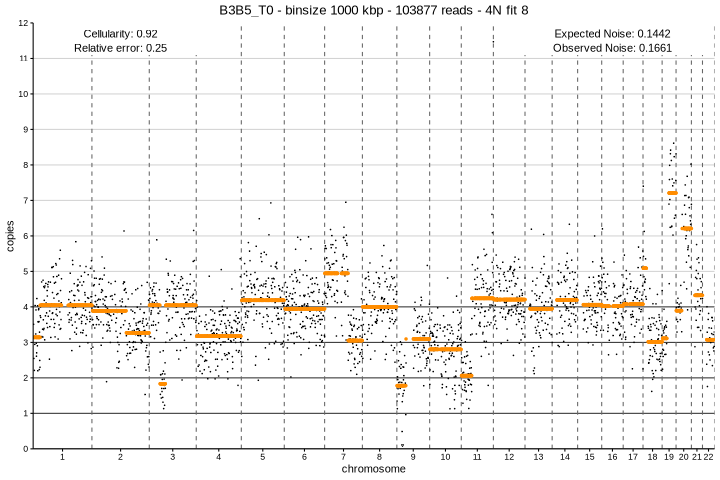

Selected this plot for B4B6_T0:  
![B4B6_T0 - 4N fit 3.png](<attachment:B4B6_T0 - 4N fit 3.png>)
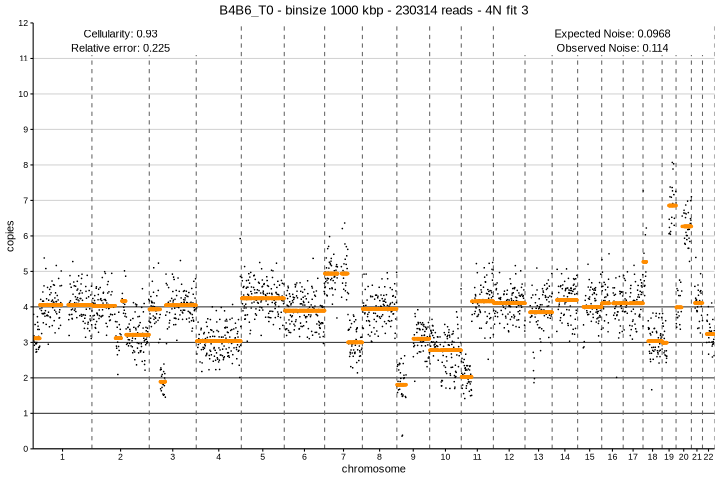

Can manually work out the nomenclature for karyotype for these, see the video for help.  

Also see this maybe for a published cell line karyotype? https://www.researchgate.net/publication/303827306_Molecular_analysis_of_urothelial_cancer_cell_lines_for_modeling_tumor_biology_and_drug_response  
It doesn't have the individual plots though.  
Does reference Steve!  

Now do IGV analysis.
use IGVTools, generate a .TDF file and visualise on IGV browser.  
turns out a tdf file is generated using the "Counts" tool from a bam, not the toTDF tool ... 

In [ ]:
ls()


character(0)

The .rds files you obtained from running runACE are serialized R objects that store the results of your analysis. Specifically, these files contain QDNAseq-objects with segmented copy number data at different bin sizes (100kbp, 500kbp, and 1000kbp). Each bin size represents the resolution at which the genome was divided for analysis:

    100kbp.rds: Contains data with bins of 100 kilobases.
    500kbp.rds: Contains data with bins of 500 kilobases.
    1000kbp.rds: Contains data with bins of 1 megabase.

These files are used to store and later retrieve the processed data, including read counts, segmentation results, and other metadata1
2
.

In [ ]:
# Load the 1000kbp data
data_1000kbp <- readRDS("/external/analyses/20241104-BEBIC_Karyotyping/ACE/241227-analyses/1000kbp.rds")


In [ ]:
data_1000kbp


QDNAseqCopyNumbers (storageMode: lockedEnvironment)
assayData: 3102 features, 3 samples 
  element names: copynumber, segmented 
protocolData: none
phenoData
  sampleNames: B3B5_T0 B4B6_T0 unclassified
  varLabels: name total.reads ... loess.family (6 total)
  varMetadata: labelDescription
featureData
  featureNames: 1:1-1000000 1:1000001-2000000 ... Y:57000001-57227415
    (3102 total)
  fvarLabels: chromosome start ... use (9 total)
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [ ]:
sample_name <- "B3B5_T0"
sample_data <- data_1000kbp[, sample_name]
sample_data


QDNAseqCopyNumbers (storageMode: lockedEnvironment)
assayData: 3102 features, 1 samples 
  element names: copynumber, segmented 
protocolData: none
phenoData
  sampleNames: B3B5_T0
  varLabels: name total.reads ... loess.family (6 total)
  varMetadata: labelDescription
featureData
  featureNames: 1:1-1000000 1:1000001-2000000 ... Y:57000001-57227415
    (3102 total)
  fvarLabels: chromosome start ... use (9 total)
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

,bin,chr,copynumbers,segments,gc,segment_mean,segment_SE,pnorm_log10,qnorm_log10,calls,color
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,1,NA,NA,2,NA,NA,NA,NA,NA,black
2,2,1,3.509259,3.140364,2,3.172655,0.1347642,-9.081,-8.752,-1,blue
3,3,1,2.547300,3.140364,2,3.172655,0.1347642,-9.081,-8.752,-1,blue
4,4,1,3.163633,3.140364,2,3.172655,0.1347642,-9.081,-8.752,-1,blue
5,5,1,2.210705,3.140364,2,3.172655,0.1347642,-9.081,-8.752,-1,blue
6,6,1,NA,NA,2,NA,NA,NA,NA,NA,black


,bin,chr,copynumbers,segments,gc,segment_mean,segment_SE,pnorm_log10,qnorm_log10,calls,color
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2882,2882,22,2.843634,3.075258,2,3.095849,0.1017311,-Inf,-Inf,-1,blue
2883,2883,22,NA,NA,2,NA,NA,NA,NA,NA,black
2884,2884,22,2.759330,3.075258,2,3.095849,0.1017311,-Inf,-Inf,-1,blue
2885,2885,22,2.883630,3.075258,2,3.095849,0.1017311,-Inf,-Inf,-1,blue
2886,2886,22,3.291792,3.075258,2,3.095849,0.1017311,-Inf,-Inf,-1,blue
2887,2887,22,NA,NA,2,NA,NA,NA,NA,NA,black


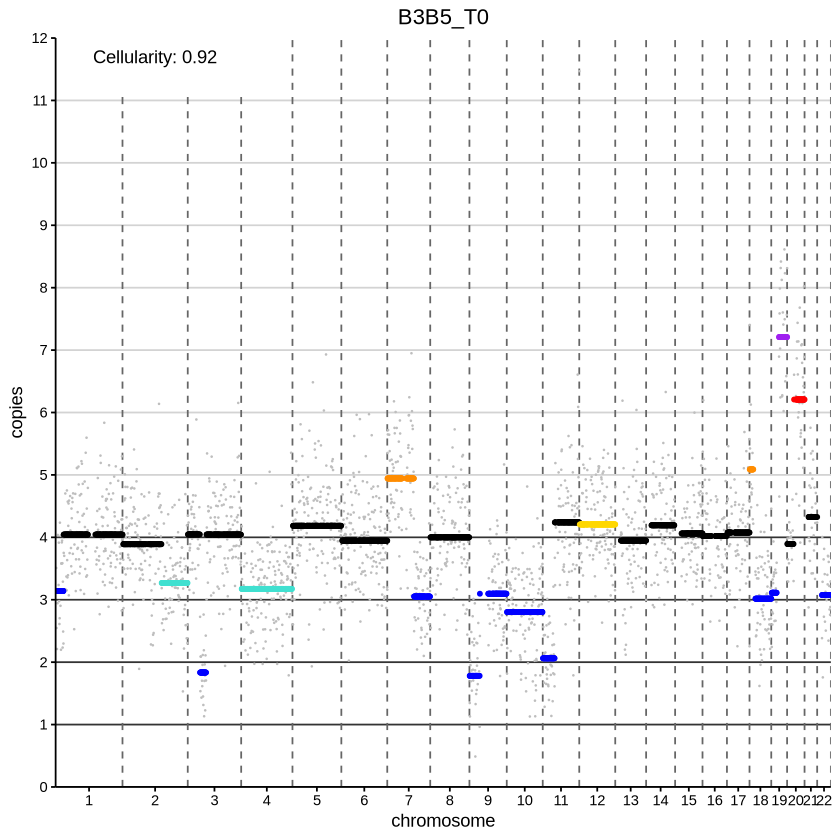

In [ ]:
# Calling of segments
called_plot = ACEcall(data_1000kbp, QDNAseqobjectsample = 1, cellularity = 0.92, ploidy = 4)

head(called_plot$calledtemplate)
tail(called_plot$calledtemplate)
called_plot$calledplot


,bin,chr,copynumbers,segments,gc,segment_mean,segment_SE,pnorm_log10,qnorm_log10,calls,color
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,1,NA,NA,2,NA,NA,NA,NA,NA,black
2,2,1,3.789322,3.113159,2,3.120461,0.06613388,-Inf,-Inf,-1,blue
3,3,1,3.040776,3.113159,2,3.120461,0.06613388,-Inf,-Inf,-1,blue
4,4,1,3.181774,3.113159,2,3.120461,0.06613388,-Inf,-Inf,-1,blue
5,5,1,2.918366,3.113159,2,3.120461,0.06613388,-Inf,-Inf,-1,blue
6,6,1,NA,NA,2,NA,NA,NA,NA,NA,black


,bin,chr,copynumbers,segments,gc,segment_mean,segment_SE,pnorm_log10,qnorm_log10,calls,color
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2882,2882,22,2.957615,3.235735,2,3.24647,0.07715478,-Inf,-Inf,-0.5,turquoise
2883,2883,22,NA,NA,2,NA,NA,NA,NA,NA,black
2884,2884,22,3.084874,3.235735,2,3.24647,0.07715478,-Inf,-Inf,-0.5,turquoise
2885,2885,22,2.626301,3.235735,2,3.24647,0.07715478,-Inf,-Inf,-0.5,turquoise
2886,2886,22,3.329763,3.235735,2,3.24647,0.07715478,-Inf,-Inf,-0.5,turquoise
2887,2887,22,NA,NA,2,NA,NA,NA,NA,NA,black


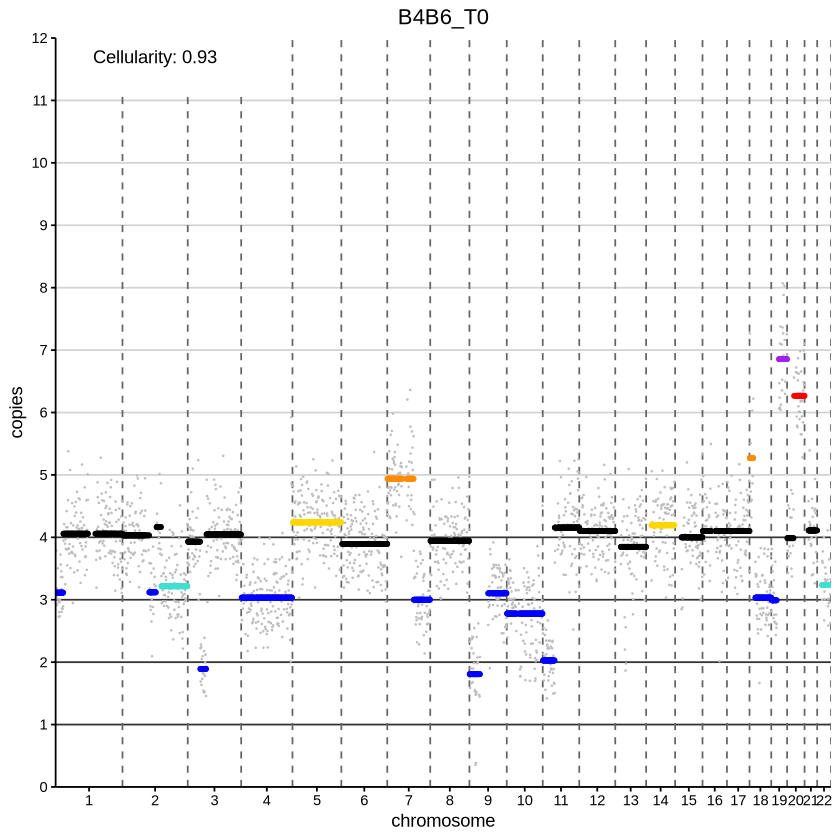

In [ ]:
# Calling of segments
called_plot = ACEcall(data_1000kbp, QDNAseqobjectsample = 2, cellularity = 0.93, ploidy = 4)

head(called_plot$calledtemplate)
tail(called_plot$calledtemplate)
called_plot$calledplot


In [ ]:
library(ACE)
library(QDNAseq.hg38)
# Load the 1000kbp data
data_1000kbp <- readRDS("/external/analyses/20241104-BEBIC_Karyotyping/ACE/241227-analyses/1000kbp.rds")


Loading required package: QDNAseq



In [ ]:
baseline_compared <- twosamplecompare(template1 = data_1000kbp, index1 = 1, ploidy1 = 4, cellularity1 = 0.92, name1 = "B3B5_T0", index2 = 2, ploidy2 = 4, cellularity2 = 0.93, name2 = "B4B6_T0")


In [ ]:
head(baseline_compared$twosampledf)
# baseline_compared$


,Chromosome,Start,End,Num_Bins,Mean1,SE1,Mean2,SE2,p_value,q_value
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1000001,28000000,23,3.210671,0.13503995,3.120461,0.06613388,0.5527707,1
2,1,28000001,29000000,1,2.298277,NA,3.948009,NA,1.0000000,1
3,1,29000001,248956422,159,4.067840,0.05063997,4.070225,0.03599605,0.9694070,1
4,2,2000001,99000000,72,3.998909,0.07164779,4.040714,0.04669641,0.6258494,1
5,2,99000001,124000000,18,3.251614,0.14913900,3.131388,0.09706739,0.5045833,1
6,2,126000001,143000000,13,4.380779,0.18479216,4.172619,0.10743510,0.3421992,1


In [ ]:
baseline_compared$twosampledf


,Chromosome,Start,End,Num_Bins,Mean1,SE1,Mean2,SE2,p_value,q_value
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1000001,28000000,23,3.210671,0.13503995,3.120461,0.06613388,0.55277073,1.0000000
2,1,28000001,29000000,1,2.298277,NA,3.948009,NA,1.00000000,1.0000000
3,1,29000001,248956422,159,4.067840,0.05063997,4.070225,0.03599605,0.96940701,1.0000000
4,2,2000001,99000000,72,3.998909,0.07164779,4.040714,0.04669641,0.62584936,1.0000000
5,2,99000001,124000000,18,3.251614,0.14913900,3.131388,0.09706739,0.50458334,1.0000000
6,2,126000001,143000000,13,4.380779,0.18479216,4.172619,0.10743510,0.34219917,1.0000000
7,2,144000001,145000000,1,4.403688,NA,3.379118,NA,1.00000000,1.0000000
8,2,145000001,242000000,79,3.293845,0.06544475,3.230106,0.05324801,0.45115791,1.0000000
9,3,1,45000000,37,4.061939,0.08447033,3.946355,0.07536833,0.31071509,1.0000000


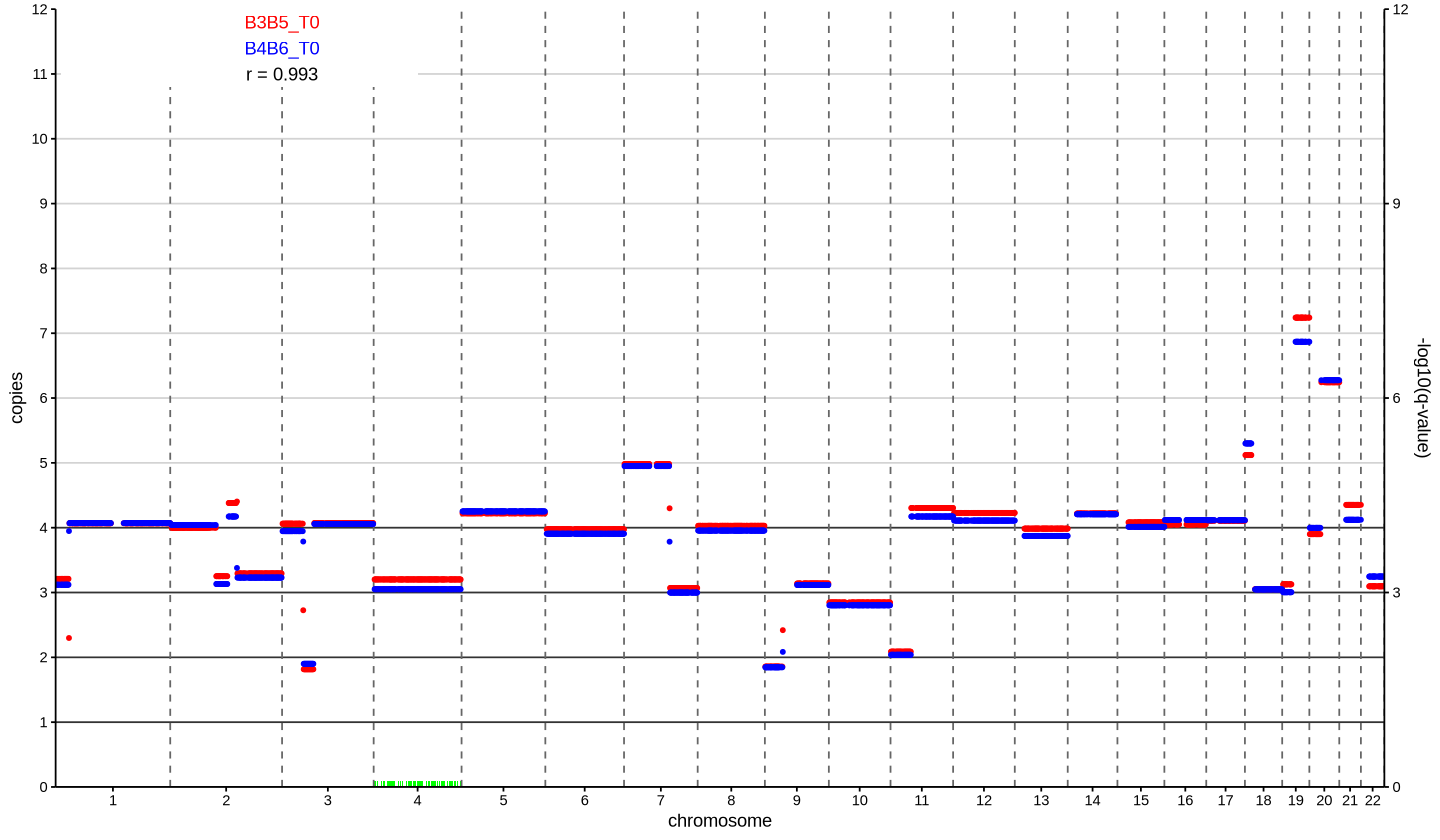

In [ ]:
baseline_compared$compareplot


In [ ]:
library(repr)
options(repr.plot.width = 12, repr.plot.height = 7)


In [ ]:
baseline_compared_plot <- baseline_compared$compareplot


In [ ]:
library(ggplot2)


In [ ]:
# Assuming baseline_compared_plot is your existing ggplot object
baseline_compared_plot <- baseline_compared_plot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )


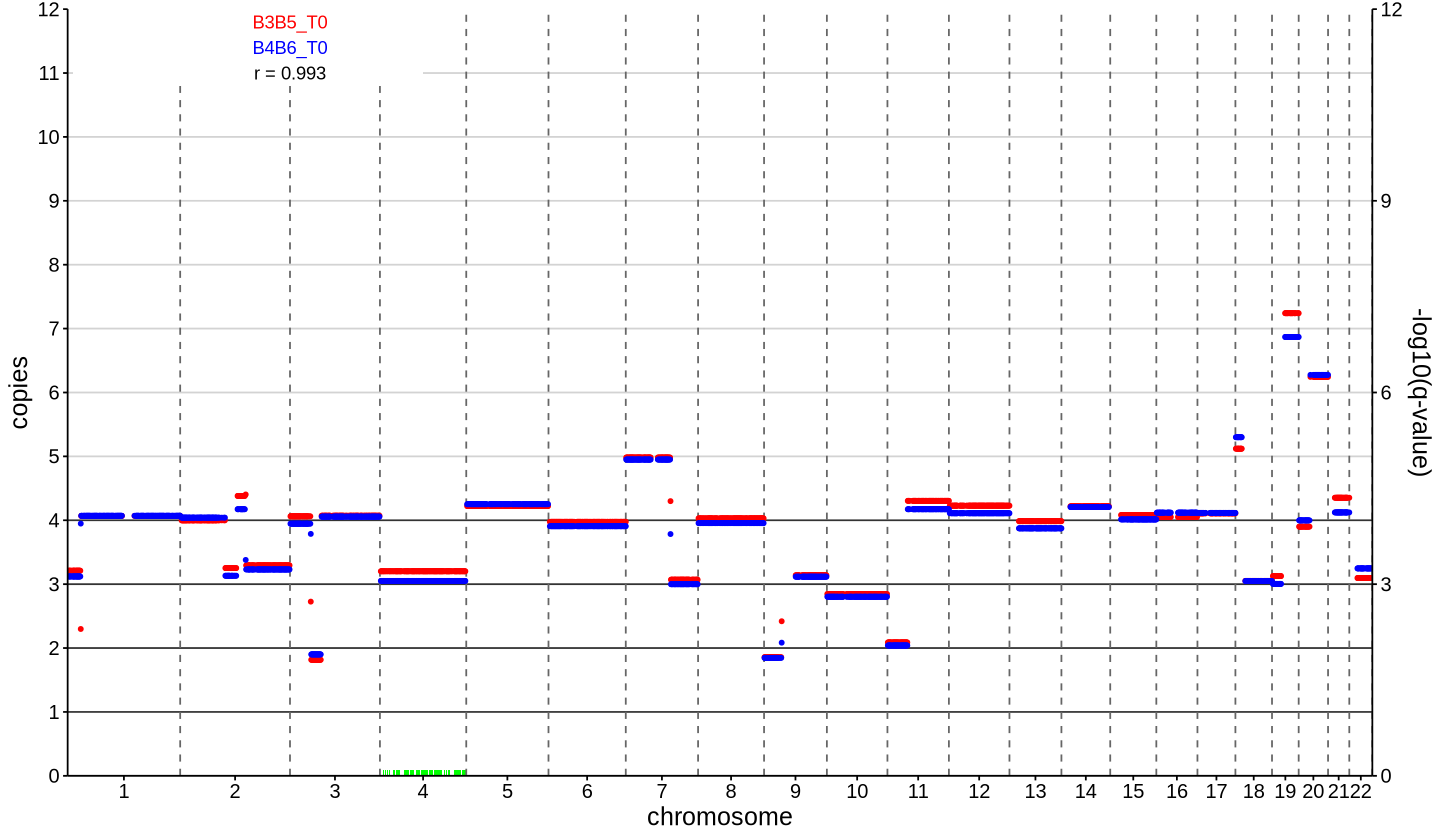

In [ ]:
baseline_compared_plot


Get overlaps of giemsa staining

In [ ]:
# sample_name <- "B3B5_T0"
# sample_data <- data_1000kbp[, sample_name]
segmented_data <- segmentBins(data_1000kbp[, "B3B5_T0"])


Performing segmentation:

    Segmenting: B3B5_T0 (1 of 1) ...



In [ ]:
library(biomaRt)
library(GenomicRanges)


Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb



In [ ]:
# Connect to Ensembl
ensembl <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")
print(listDatasets(ensembl))


                           dataset
1     abrachyrhynchus_gene_ensembl
2         acalliptera_gene_ensembl
3       acarolinensis_gene_ensembl
4        acchrysaetos_gene_ensembl
5        acitrinellus_gene_ensembl
6        amelanoleuca_gene_ensembl
7          amexicanus_gene_ensembl
8          anancymaae_gene_ensembl
9          aocellaris_gene_ensembl
10           apercula_gene_ensembl
11     aplatyrhynchos_gene_ensembl
12      apolyacanthus_gene_ensembl
13    applatyrhynchos_gene_ensembl
14       atestudineus_gene_ensembl
15            bbbison_gene_ensembl
16         bgrunniens_gene_ensembl
17           bihybrid_gene_ensembl
18          bmusculus_gene_ensembl
19             bmutus_gene_ensembl
20         bsplendens_gene_ensembl
21            btaurus_gene_ensembl
22        cabingdonii_gene_ensembl
23              catys_gene_ensembl
24           cauratus_gene_ensembl
25           cccarpio_gene_ensembl
26       cdromedarius_gene_ensembl
27           celegans_gene_ensembl
28        cgchok1gsh

In [ ]:
# Retrieve chromosomal band information
bands <- getBM(attributes = c("chromosome_name", "start_position", "end_position", "band"), mart = ensembl)

# Convert to GRanges object
bands_gr <- GRanges(
    seqnames = bands$chromosome_name,
    ranges = IRanges(start = bands$start_position, end = bands$end_position),
    band = bands$band
)


In [ ]:
library(Biobase)


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.




In [ ]:
print(segmented_data)

bins <- fData(segmented_data)
segments <- assayData(segmented_data)$segmented

# Create a GRanges object
gr <- GRanges(
  seqnames = Rle(bins$chromosome),
  ranges = IRanges(start = bins$start, end = bins$end),
  copy_number = segments
)


QDNAseqCopyNumbers (storageMode: lockedEnvironment)
assayData: 3102 features, 1 samples 
  element names: copynumber, segmented 
protocolData: none
phenoData
  sampleNames: B3B5_T0
  varLabels: name total.reads ... loess.family (6 total)
  varMetadata: labelDescription
featureData
  featureNames: 1:1-1000000 1:1000001-2000000 ... Y:57000001-57227415
    (3102 total)
  fvarLabels: chromosome start ... use (9 total)
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  


In [ ]:
# Calling of segments
called_plot = ACEcall(data_1000kbp, QDNAseqobjectsample = 2, cellularity = 0.93, ploidy = 4)

called_data <- called_plot$calledtemplate


In [ ]:
getadjustedsegments(called_plot)


ERROR: Error in rep(2, nrow(template.na)): invalid 'times' argument


In [ ]:
dim(called_data)
head(called_data)
dim(bins)
head(bins)
dim(segments)
head(segments)


[1] 2887   11

,bin,chr,copynumbers,segments,gc,segment_mean,segment_SE,pnorm_log10,qnorm_log10,calls,color
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,1,NA,NA,2,NA,NA,NA,NA,NA,black
2,2,1,3.789322,3.113159,2,3.120461,0.06613388,-Inf,-Inf,-1,blue
3,3,1,3.040776,3.113159,2,3.120461,0.06613388,-Inf,-Inf,-1,blue
4,4,1,3.181774,3.113159,2,3.120461,0.06613388,-Inf,-Inf,-1,blue
5,5,1,2.918366,3.113159,2,3.120461,0.06613388,-Inf,-Inf,-1,blue
6,6,1,NA,NA,2,NA,NA,NA,NA,NA,black


[1] 3102    9

,chromosome,start,end,bases,gc,mappability,blacklist,residual,use
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1:1-1000000,1,1,1000000,84.0000,45.65405,25.1118,0.6201,NaN,FALSE
1:1000001-2000000,1,1000001,2000000,100.0000,57.28530,79.0713,0.0000,-0.042750248,TRUE
1:2000001-3000000,1,2000001,3000000,95.6491,58.37117,85.9538,0.0000,0.054546529,TRUE
1:3000001-4000000,1,3000001,4000000,100.0000,56.47090,93.8667,0.0000,-0.016908948,TRUE
1:4000001-5000000,1,4000001,5000000,100.0000,47.89910,91.0249,0.0000,-0.018440998,TRUE
1:5000001-6000000,1,5000001,6000000,100.0000,47.23490,92.1461,0.0484,-0.007100964,FALSE


[1] 3102    1

,B3B5_T0
1:1-1000000,NA
1:1000001-2000000,0.7790566
1:2000001-3000000,0.7790566
1:3000001-4000000,0.7790566
1:4000001-5000000,0.7790566
1:5000001-6000000,NA


In [ ]:
# Convert segmented data to GRanges
bins <- fData(segmented_data)
segments <- assayData(segmented_data)$segmented
segments_gr <- GRanges(
  seqnames = Rle(bins$chromosome),
  ranges = IRanges(start = bins$start, end = bins$end),
  copy_number = segments
)


In [ ]:
segments_gr
bands_gr


GRanges object with 3102 ranges and 1 metadata column:
         seqnames            ranges strand | copy_number.B3B5_T0
            <Rle>         <IRanges>  <Rle> |           <numeric>
     [1]        1         1-1000000      * |                  NA
     [2]        1   1000001-2000000      * |            0.779057
     [3]        1   2000001-3000000      * |            0.779057
     [4]        1   3000001-4000000      * |            0.779057
     [5]        1   4000001-5000000      * |            0.779057
     ...      ...               ...    ... .                 ...
  [3098]        Y 53000001-54000000      * |                  NA
  [3099]        Y 54000001-55000000      * |                  NA
  [3100]        Y 55000001-56000000      * |                  NA
  [3101]        Y 56000001-57000000      * |                  NA
  [3102]        Y 57000001-57227415      * |                  NA
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

GRanges object with 86379 ranges and 1 metadata column:
          seqnames              ranges strand |        band
             <Rle>           <IRanges>  <Rle> | <character>
      [1]       MT             577-647      * |            
      [2]       MT            648-1601      * |            
      [3]       MT           1602-1670      * |            
      [4]       MT           1671-3229      * |            
      [5]       MT           3230-3304      * |            
      ...      ...                 ...    ... .         ...
  [86375]        1   41241772-41338644      * |       p34.2
  [86376]        1 212467563-212556085      * |       q32.3
  [86377]        1   94585556-94855426      * |       p21.3
  [86378]        1         14356-30744      * |      p36.33
  [86379]        1        89295-181719      * |      p36.33
  -------
  seqinfo: 528 sequences from an unspecified genome; no seqlengths

In [ ]:
# Filter out entries with no band
bands_gr <- bands_gr[!is.na(bands_gr$band)]
# Restrict to chromosomes 1-22
bands_gr <- bands_gr[seqnames(bands_gr) %in% as.character(1:22)]
bands_gr


GRanges object with 75035 ranges and 1 metadata column:
          seqnames              ranges strand |        band
             <Rle>           <IRanges>  <Rle> | <character>
      [1]       13   23730189-23889400      * |      q12.12
      [2]       13   25017404-25017536      * |      q12.13
      [3]       13   18467172-18485448      * |         q11
      [4]       13   26965967-26991996      * |      q12.13
      [5]       13   40224625-40224862      * |      q14.11
      ...      ...                 ...    ... .         ...
  [75031]        1   41241772-41338644      * |       p34.2
  [75032]        1 212467563-212556085      * |       q32.3
  [75033]        1   94585556-94855426      * |       p21.3
  [75034]        1         14356-30744      * |      p36.33
  [75035]        1        89295-181719      * |      p36.33
  -------
  seqinfo: 528 sequences from an unspecified genome; no seqlengths

In [ ]:
unique(seqnames(bands_gr))


[1] 13 21 18 20 22 14 10 9  16 7  4  5  12 17 11 6  19 3  2  1  15 8 
528 Levels: MT KI270741.1 KI270751.1 KI270711.1 KI270744.1 ... 8

In [ ]:
# Find overlaps between segments and bands
overlaps <- findOverlaps(segments_gr, bands_gr)


In [ ]:
# Create a data frame of overlaps
overlap_df <- data.frame(
    segment = queryHits(overlaps),
    band = bands_gr$band[subjectHits(overlaps)]
)

# Summarize to get a single band per segment (e.g., the most frequent band)
summarized_bands <- aggregate(band ~ segment, data = overlap_df, FUN = function(x) {
    names(sort(table(x), decreasing = TRUE))[1]
})


In [ ]:
# Create a vector of bands for each segment
segment_bands <- rep(NA, length(segments_gr))
segment_bands[summarized_bands$segment] <- summarized_bands$band

# Assign the summarized bands to the segments
segments_gr$band <- segment_bands


In [ ]:
segments_gr <- segments_gr[seqnames(segments_gr) %in% as.character(1:22)]
segments_gr


GRanges object with 2887 ranges and 2 metadata columns:
         seqnames            ranges strand | copy_number.B3B5_T0        band
            <Rle>         <IRanges>  <Rle> |           <numeric> <character>
     [1]        1         1-1000000      * |                  NA      p36.33
     [2]        1   1000001-2000000      * |            0.779057      p36.33
     [3]        1   2000001-3000000      * |            0.779057      p36.32
     [4]        1   3000001-4000000      * |            0.779057      p36.32
     [5]        1   4000001-5000000      * |            0.779057      p36.32
     ...      ...               ...    ... .                 ...         ...
  [2883]       22 46000001-47000000      * |                  NA      q13.31
  [2884]       22 47000001-48000000      * |            0.765832      q13.31
  [2885]       22 48000001-49000000      * |            0.765832      q13.32
  [2886]       22 49000001-50000000      * |            0.765832      q13.33
  [2887]       22 50

In [ ]:
subset(segments_gr, seqnames == "5")


GRanges object with 182 ranges and 2 metadata columns:
        seqnames              ranges strand | copy_number.B3B5_T0        band
           <Rle>           <IRanges>  <Rle> |           <numeric> <character>
    [1]        5           1-1000000      * |                  NA      p15.33
    [2]        5     1000001-2000000      * |             1.02548      p15.33
    [3]        5     2000001-3000000      * |             1.02548      p15.33
    [4]        5     3000001-4000000      * |             1.02548      p15.33
    [5]        5     4000001-5000000      * |             1.02548      p15.32
    ...      ...                 ...    ... .                 ...         ...
  [178]        5 177000001-178000000      * |                  NA       q35.3
  [179]        5 178000001-179000000      * |             1.02548       q35.3
  [180]        5 179000001-180000000      * |             1.02548       q35.3
  [181]        5 180000001-181000000      * |             1.02548       q35.3
  [182]  

In [ ]:
library(dplyr)



Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:biomaRt’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# merge the duplicate rows of granges
df <- as.data.frame(segments_gr)
# Group by copy number and band, then summarize the ranges
merged_df <- df %>%
  group_by(copy_number.B3B5_T0, band) %>%
  reframe(
    seqnames = unique(seqnames),
    start = min(start),
    end = max(end)
  )

merged_df <- merged_df %>%
  filter(!(is.na(copy_number.B3B5_T0) & is.na(band)))

merged_gr <- GRanges(
  seqnames = Rle(merged_df$seqnames),
  ranges = IRanges(start = merged_df$start, end = merged_df$end),
  copy_number = merged_df$copy_number.B3B5_T0,
  band = merged_df$band
)
merged_gr


GRanges object with 1109 ranges and 2 metadata columns:
         seqnames              ranges strand | copy_number        band
            <Rle>           <IRanges>  <Rle> |   <numeric> <character>
     [1]        3   64000001-68000000      * |    0.463487       p14.1
     [2]        3   59000001-64000000      * |    0.463487       p14.2
     [3]        3   55000001-59000000      * |    0.463487       p14.3
     [4]        3   52000001-55000000      * |    0.463487       p21.1
     [5]        3   51000001-52000000      * |    0.463487       p21.2
     ...      ...                 ...    ... .         ...         ...
  [1105]        1 226000001-227000000      * |          NA      q42.12
  [1106]        1 227000001-230000000      * |          NA      q42.13
  [1107]        1 233000001-234000000      * |          NA       q42.2
  [1108]        1 235000001-236000000      * |          NA       q42.3
  [1109]        1 237000001-238000000      * |          NA         q43
  -------
  seqinfo: 

Try another way

In [ ]:
## using segmented data from a QDNAseq-object

segmentdf <- getadjustedsegments(data_1000kbp, QDNAseqobjectsample = 1, cellularity = 0.92, ploidy = 4)

# analyzegenomiclocations(segmentdf, Chromosome = 5, Position = 26365569)
# analyzegenomiclocations(segmentdf, Chromosome = 5, Position = 26365569,
#   Frequency = 25, cellularity = 0.39)

segmentdf


Chromosome,Start,End,Num_Bins,Segment_Mean,Segment_Mean2,Segment_SE,Copies,P_log10
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000001,29000000,24,3.140364,3.172655,0.13476419,3,-0.699
1,29000001,248956422,159,4.044172,4.067840,0.05063997,4,-0.744
2,2000001,145000000,104,3.889929,3.921196,0.06822377,4,-0.605
2,145000001,242000000,79,3.268875,3.293845,0.06544475,3,-5.147
3,1,45000000,37,4.046856,4.061939,0.08447033,4,-0.334
3,45000001,68000000,23,1.834002,1.855755,0.08970439,2,-0.967
3,69000001,198000000,103,4.044172,4.071183,0.06479159,4,-0.566
4,1000001,189000000,149,3.173757,3.201652,0.05066306,3,-4.162
5,1000001,181000000,142,4.184900,4.222186,0.06716244,4,-3.027


In [ ]:
# Convert to GRanges object
segmentgr <- GRanges(
    seqnames = segmentdf$Chromosome,
    ranges = IRanges(start = segmentdf$Start, end = segmentdf$End),
    Copies = segmentdf$Copies
)
segmentgr


GRanges object with 32 ranges and 1 metadata column:
       seqnames              ranges strand |    Copies
          <Rle>           <IRanges>  <Rle> | <numeric>
   [1]        1    1000001-29000000      * |         3
   [2]        1  29000001-248956422      * |         4
   [3]        2   2000001-145000000      * |         4
   [4]        2 145000001-242000000      * |         3
   [5]        3          1-45000000      * |         4
   ...      ...                 ...    ... .       ...
  [28]       19   28000001-58617616      * |         7
  [29]       20          1-24000000      * |         4
  [30]       20   25000001-64444167      * |         6
  [31]       21   14000001-46709983      * |         4
  [32]       22   17000001-50000000      * |         3
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [ ]:
# Find overlaps between segments and bands
overlaps <- findOverlaps(segmentgr, bands_gr)

# Create a data frame of overlaps
overlap_df <- data.frame(
    segment = queryHits(overlaps),
    band = bands_gr$band[subjectHits(overlaps)]
)

# Summarize to get a list of bands per segment
summarized_bands <- aggregate(band ~ segment, data = overlap_df, FUN = function(x) {
    list(unique(x))
})

# Create a vector of bands for each segment
segment_bands <- vector("list", length(segmentgr))
segment_bands[summarized_bands$segment] <- summarized_bands$band

# Assign the summarized bands to the segments
segmentgr$band <- segment_bands


In [ ]:
segmentgr <- segmentgr[seqnames(segmentgr) %in% as.character(1:22)]
segmentgr


GRanges object with 32 ranges and 2 metadata columns:
       seqnames              ranges strand |    Copies                     band
          <Rle>           <IRanges>  <Rle> | <numeric>                   <list>
   [1]        1    1000001-29000000      * |         3 p36.32,p36.31,p36.22,...
   [2]        1  29000001-248956422      * |         4    p35.3,p35.2,p34.3,...
   [3]        2   2000001-145000000      * |         4    p25.3,p25.2,p25.1,...
   [4]        2 145000001-242000000      * |         3    q31.1,q24.1,q33.3,...
   [5]        3          1-45000000      * |         4    p26.3,p26.2,p25.1,...
   ...      ...                 ...    ... .       ...                      ...
  [28]       19   28000001-58617616      * |         7    q12,q13.11,q13.12,...
  [29]       20          1-24000000      * |         4      p13,p12.1,p12.3,...
  [30]       20   25000001-64444167      * |         6  q11.1,q11.22,q11.21,...
  [31]       21   14000001-46709983      * |         4    q21.1,q2

In [ ]:
as.data.frame(segmentgr)


seqnames,start,end,width,strand,Copies,band
<fct>,<int>,<int>,<int>,<fct>,<dbl>,<list>
1,1000001,29000000,28000000,*,3,"p36.32, ...."
1,29000001,248956422,219956422,*,4,"p35.3, p...."
2,2000001,145000000,143000000,*,4,"p25.3, p...."
2,145000001,242000000,97000000,*,3,"q31.1, q...."
3,1,45000000,45000000,*,4,"p26.3, p...."
3,45000001,68000000,23000000,*,2,"p21.31, ...."
3,69000001,198000000,129000000,*,4,"p12.2, p...."
4,1000001,189000000,188000000,*,3,"p16.1, p...."
5,1000001,181000000,180000000,*,4,"p15.33, ...."


## Karyotyping of each baseline sample

In [ ]:
# devtools::install_github("asntech/QDNAseq.hg38@main")
# For installing in gen_venv

Using GitHub PAT from the git credential store.




future.apply (1.11.2 -> 1.11.3) [CRAN]
matrixStats  (1.4.1  -> 1.5.0 ) [CRAN]


Skipping 20 packages ahead of CRAN: GenomeInfoDbData, Rhtslib, BiocParallel, zlibbioc, XVector, IRanges, S4Vectors, BiocGenerics, Biostrings, GenomicRanges, GenomeInfoDb, limma, marray, CGHbase, Biobase, DNAcopy, impute, Rsamtools, CGHcall, QDNAseq

Installing 2 packages: future.apply, matrixStats

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpFetc5x/remotes2204c73a1c2b5e/asntech-QDNAseq.hg38-6f0c80b/DESCRIPTION’ ... OK
* preparing ‘QDNAseq.hg38’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
  NB: this package now depends on R (>= 3.5.0)
  serialize/load version 3 cannot be read in older versions of R.
  File(s) containing such objects:
    ‘QDNAseq.hg38/data/hg38.1000kbp.SR50.rda’
    ‘QDNAseq.hg38/data/hg38.100kbp.SR50.rda’
    ‘QDNAseq.hg38/data/hg38.10kbp.SR50.rda’
    ‘QDNAseq.hg38/data/hg38.15kbp.SR50.rda’
    ‘QDNAseq.hg38/data/hg38.1kbp.SR50.rda’
    ‘QDNAseq.hg38/data/hg38.30kbp.SR50.rda’
    ‘QDNAseq.hg38/data/hg38.500kbp.SR50.rda’
    ‘QDNAseq.hg38/data/hg38.50kbp.SR50.rda’
    ‘QDNAseq.hg38/data/hg38.5kbp.SR50.rda’
* building ‘

In [1]:
library(dplyr)
library(tidyr)
library(Biobase)
library(biomaRt)
library(GenomicRanges)
library(ggplot2)
library(ACE)
library(QDNAseq.hg38)
library(repr)

options(repr.plot.width = 12, repr.plot.height = 7)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with

Get band info for all

In [9]:
# Connect to Ensembl
ensembl <- useMart("ensembl", dataset = "hsapiens_gene_ensembl", host="https://asia.ensembl.org")

# Retrieve chromosomal band information
bands <- getBM(attributes = c("chromosome_name", "start_position", "end_position", "band"), mart = ensembl)

# Convert to GRanges object
bands_gr <- GRanges(
    seqnames = bands$chromosome_name,
    ranges = IRanges(start = bands$start_position, end = bands$end_position),
    band = bands$band
)

# Filter out entries with no band
bands_gr <- bands_gr[!is.na(bands_gr$band)]
# Restrict to chromosomes 1-22
bands_gr <- bands_gr[seqnames(bands_gr) %in% as.character(1:22)]


Function for getting karyotype info

In [3]:
# Make function for getting karyotype info

get_all_karyotype_info <- function(name, ploidy, cellularity, QDNAseq_object_sample_idx, data) {
    #################################################
    # Save called plot
    # Calling of segments
    called_plot <- ACEcall(
    data,
    QDNAseqobjectsample = QDNAseq_object_sample_idx, cellularity = cellularity, ploidy = ploidy
    )

    save_called_plot <- called_plot$calledplot +
    theme(
        axis.title = element_text(size = 15), # Increase axis title font size
        axis.text = element_text(size = 12), # Increase axis tick label font size
        plot.title = element_blank()
    )


    ggsave(
    filename = paste0(name, ".", "CN_called_plot.png"),
    plot = save_called_plot, dpi = 320, width = 12
    )

    ##################### Get chromosome segments ############################
    # using segmented data from a QDNAseq-object
    segmentdf <- getadjustedsegments(
        data,
        QDNAseqobjectsample = QDNAseq_object_sample_idx, cellularity = cellularity, ploidy = ploidy
    )

    # Convert to GRanges object
    segmentgr <- GRanges(
        seqnames = segmentdf$Chromosome,
        ranges = IRanges(start = segmentdf$Start, end = segmentdf$End),
        Copies = segmentdf$Copies
    )

    # Find overlaps between segments and bands
    overlaps <- findOverlaps(segmentgr, bands_gr)

    # Create a data frame of overlaps
    overlap_df <- data.frame(
        segment = queryHits(overlaps),
        band = bands_gr$band[subjectHits(overlaps)]
    )

    # Summarize to get a list of bands per segment
    summarized_bands <- aggregate(band ~ segment, data = overlap_df, FUN = function(x) {
        list(unique(x))
    })

    # Create a vector of bands for each segment
    segment_bands <- vector("list", length(segmentgr))
    segment_bands[summarized_bands$segment] <- summarized_bands$band

    # Assign the summarized bands to the segments
    segmentgr$band <- segment_bands
    segmentgr <- segmentgr[seqnames(segmentgr) %in% as.character(1:22)]

    ######################### get copies per segment ##########################

    df_sample_copies <- as.data.frame(segmentgr)
    df_sample_copies$band <- as.character(df_sample_copies$band)
    # as.
    write.csv(df_sample_copies, paste0(name, "_karyotype.csv"))

    segment_df = as.data.frame(segmentgr)
    segmentdf_long <- segment_df %>%
    unnest(band)
    segmentdf_long$start = NULL
    segmentdf_long$end = NULL
    segmentdf_long$width = NULL
    segmentdf_long$strand = NULL

    write.csv(segmentdf_long, paste0(name, "_karyotype.perband.csv"))
    head(segmentdf_long)
}

#### Do baseline sample 1

run ACE

In [ ]:
# specify the directory containing your bam-files
path2alignedbam <- "/mnt/uow-pathology-dun/lucy/analyses/BEBIC_analysis/CellLineB/demuxed/by_sample/B3B5_Baseline/"
output_dir <- "/external/analyses/20241104-BEBIC_Karyotyping/ACE/B3B5_Baseline"
# if you do not want the output in the same directory, use argument outputdir
# runACE(path2alignedbam,
#     filetype = "bam",
#     ploidies = c(4), imagetype = "png", genome = "hg38", outputdir = output_dir
# )


Loaded bin annotations for genome ‘hg38’, bin size 100 kbp, and experiment type ‘SR50’ from annotation package QDNAseq.hg38 v1.0.0

    B3B5_Baseline.allchr (1 of 1): 
extracting reads ...
 binning ...


30,894	total bins
28,760	of which in selected chromosomes
27,679	of which with reference sequence
24,888	final bins

Calculating correction for GC content and mappability

    Calculating fit for sample B3B5_Baseline.allchr (1 of 1) ...

Done.

Applying median normalization ...


Smoothing outliers ...


Performing segmentation:

    Segmenting: B3B5_Baseline.allchr (1 of 1) ...



NULL
NULL
[[1]]



Loaded bin annotations for genome ‘hg38’, bin size 500 kbp, and experiment type ‘SR50’ from annotation package QDNAseq.hg38 v1.0.0

    B3B5_Baseline.allchr (1 of 1): 
extracting reads ...
 binning ...


6,188	total bins
5,760	of which in selected chromosomes
5,549	of which with reference sequence
4,678	final bins

Calculating correction for GC content and mappability

    Calculating fit for sample B3B5_Baseline.allchr (1 of 1) ...

Done.

Applying median normalization ...


Smoothing outliers ...


Performing segmentation:

    Segmenting: B3B5_Baseline.allchr (1 of 1) ...



NULL
NULL
[[1]]



Loaded bin annotations for genome ‘hg38’, bin size 1000 kbp, and experiment type ‘SR50’ from annotation package QDNAseq.hg38 v1.0.0

    B3B5_Baseline.allchr (1 of 1): 
extracting reads ...
 binning ...


3,102	total bins
2,887	of which in selected chromosomes
2,784	of which with reference sequence
2,159	final bins

Calculating correction for GC content and mappability

    Calculating fit for sample B3B5_Baseline.allchr (1 of 1) ...

Done.

Applying median normalization ...


Smoothing outliers ...


Performing segmentation:

    Segmenting: B3B5_Baseline.allchr (1 of 1) ...



NULL
NULL
[[1]]



Choose a best fit plot:

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B3B5_Baseline/1000kbp/4N/likelyfits/B3B5_Baseline.allchr_bestfit_4N.png)

Load bin data for comparisons

In [ ]:
# load data
# data <- readRDS("/external/analyses/20241104-BEBIC_Karyotyping/ACE/241227-analyses/1000kbp.rds")
data <- readRDS("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B3B5_Baseline/1000kbp.rds")
# last fit from 1000kbp: see /home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B3B5_Baseline/1000kbp/4N/fitpicker_4N.tsv
# cellularity 0.94

# Choose sample
name = "B3B5_T0"
ploidy <- 4
cellularity <- 0.94
QDNAseq_object_sample_idx = 1


In [ ]:
# Save called plot
# Calling of segments
called_plot <- ACEcall(
  data,
  QDNAseqobjectsample = QDNAseq_object_sample_idx, cellularity = cellularity, ploidy = ploidy
)

save_called_plot <- called_plot$calledplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
    plot.title = element_blank()
  )


ggsave(
  filename = paste0(name, ".", "CN_called_plot.png"),
  plot = save_called_plot, dpi = 320, width = 12
)


Saving 12 x 7 in image


Called plot  

<img src="/home/dejlu879/BEBIC_Karyotyping/B3B5_T0.CN_called_plot.png" alt="called_plot" style="width: 800px;"/>

In [ ]:
# using segmented data from a QDNAseq-object
segmentdf <- getadjustedsegments(
    data,
    QDNAseqobjectsample = QDNAseq_object_sample_idx, cellularity = cellularity, ploidy = ploidy
)

# Convert to GRanges object
segmentgr <- GRanges(
    seqnames = segmentdf$Chromosome,
    ranges = IRanges(start = segmentdf$Start, end = segmentdf$End),
    Copies = segmentdf$Copies
)

# Find overlaps between segments and bands
overlaps <- findOverlaps(segmentgr, bands_gr)

# Create a data frame of overlaps
overlap_df <- data.frame(
    segment = queryHits(overlaps),
    band = bands_gr$band[subjectHits(overlaps)]
)

# Summarize to get a list of bands per segment
summarized_bands <- aggregate(band ~ segment, data = overlap_df, FUN = function(x) {
    list(unique(x))
})

# Create a vector of bands for each segment
segment_bands <- vector("list", length(segmentgr))
segment_bands[summarized_bands$segment] <- summarized_bands$band

# Assign the summarized bands to the segments
segmentgr$band <- segment_bands
segmentgr <- segmentgr[seqnames(segmentgr) %in% as.character(1:22)]


___
##### Looking at double ups of bands

In [ ]:
segmentgr$band <- segment_bands
segmentgr

GRanges object with 39 ranges and 2 metadata columns:
       seqnames              ranges strand |    Copies                     band
          <Rle>           <IRanges>  <Rle> | <numeric>                   <list>
   [1]        1    1000001-30000000      * |         3 p36.32,p36.31,p36.22,...
   [2]        1  30000001-248956422      * |         4    p34.3,p35.1,p34.2,...
   [3]        2   2000001-100000000      * |         4    p25.3,p25.2,p25.1,...
   [4]        2 100000001-124000000      * |         3    q12.1,q11.2,q12.3,...
   [5]        2 126000001-145000000      * |         4    q21.1,q21.2,q14.3,...
   ...      ...                 ...    ... .       ...                      ...
  [35]       19   28000001-58617616      * |         7    q12,q13.11,q13.12,...
  [36]       20          1-24000000      * |         4      p13,p12.1,p12.3,...
  [37]       20   25000001-64444167      * |         6  q11.1,q11.22,q11.21,...
  [38]       21   14000001-46709983      * |         4    q21.1,q2

In [ ]:
chr1 = subsetByOverlaps(segmentgr, GRanges("1:1000001-248956422"))
chr1

GRanges object with 2 ranges and 2 metadata columns:
      seqnames             ranges strand |    Copies                     band
         <Rle>          <IRanges>  <Rle> | <numeric>                   <list>
  [1]        1   1000001-30000000      * |         3 p36.32,p36.31,p36.22,...
  [2]        1 30000001-248956422      * |         4    p34.3,p35.1,p34.2,...
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [ ]:
flattened = unlist(chr1$band)
length(flattened)
flattened[duplicated(flattened)]


[1] 61

[1] "p35.2"

In [ ]:
# Convert to GRanges object
orig_segmentgr <- GRanges(
    seqnames = segmentdf$Chromosome,
    ranges = IRanges(start = segmentdf$Start, end = segmentdf$End),
    Copies = segmentdf$Copies
)
orig_segmentgr

GRanges object with 39 ranges and 1 metadata column:
       seqnames              ranges strand |    Copies
          <Rle>           <IRanges>  <Rle> | <numeric>
   [1]        1    1000001-30000000      * |         3
   [2]        1  30000001-248956422      * |         4
   [3]        2   2000001-100000000      * |         4
   [4]        2 100000001-124000000      * |         3
   [5]        2 126000001-145000000      * |         4
   ...      ...                 ...    ... .       ...
  [35]       19   28000001-58617616      * |         7
  [36]       20          1-24000000      * |         4
  [37]       20   25000001-64444167      * |         6
  [38]       21   14000001-46709983      * |         4
  [39]       22   17000001-50000000      * |         3
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [ ]:
length(orig_segmentgr$Copies)

[1] 39

In [ ]:
library(dplyr)
library(tidyr)


Attaching package: ‘tidyr’


The following object is masked from ‘package:S4Vectors’:

    expand




In [ ]:
segment_df = as.data.frame(segmentgr)
segmentdf_long <- segment_df %>%
  unnest(band)
segmentdf_long$start = NULL
segmentdf_long$end = NULL
segmentdf_long$width = NULL
segmentdf_long$strand = NULL
head(segmentdf_long)

seqnames,Copies,band
<fct>,<dbl>,<chr>
1,3,p36.32
1,3,p36.31
1,3,p36.22
1,3,p36.23
1,3,p36.21
1,3,p36.13


In [ ]:
overlap_df

segment,band
<int>,<chr>
1,p36.32
1,p36.31
1,p36.32
1,p36.31
1,p36.22
1,p36.32
1,p36.22
1,p36.32
1,p36.32


p35.2, p35.3, p36.11, p36.12, p36.13, p36.21, p36.22, p36.23, p36.31, p36.32, p36.33


___
##### return to analysis

In [ ]:
df_B3B5_T0_copies = as.data.frame(segmentgr)
df_B3B5_T0_copies$band <- as.character(df_B3B5_T0_copies$band)
# as.
write.csv(df_B3B5_T0_copies, "B3B5_T0_karyotype.csv")


In [ ]:
segment_df = as.data.frame(segmentgr)
segmentdf_long <- segment_df %>%
  unnest(band)
segmentdf_long$start = NULL
segmentdf_long$end = NULL
segmentdf_long$width = NULL
segmentdf_long$strand = NULL

write.csv(segmentdf_long, "B3B5_T0_karyotype.perband.csv")
head(segmentdf_long)

seqnames,Copies,band
<fct>,<dbl>,<chr>
1,3,p36.32
1,3,p36.31
1,3,p36.22
1,3,p36.23
1,3,p36.21
1,3,p36.13


baseline sample 2  

Choose a best fit plot: 

![bestfit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B4B6_Baseline/1000kbp/4N/likelyfits/B4B6_Baseline.allchr_bestfit_4N.png)

Load bin data for comparisons


In [ ]:
# load data
data <- readRDS("/external/analyses/20241104-BEBIC_Karyotyping/ACE/B4B6_Baseline/1000kbp.rds")

# Choose sample
name <- "B4B6_T0"
ploidy <- 4
cellularity <- 0.92
QDNAseq_object_sample_idx <- 1


In [ ]:
# Save called plot
# Calling of segments
called_plot <- ACEcall(
  data,
  QDNAseqobjectsample = QDNAseq_object_sample_idx, cellularity = cellularity, ploidy = ploidy
)

save_called_plot <- called_plot$calledplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
    plot.title = element_blank()
  )


ggsave(
  filename = paste0(name, ".", "CN_called_plot.png"),
  plot = save_called_plot, dpi = 320, width = 12
)


Saving 12 x 7 in image


Called plot  

<img src="/home/dejlu879/BEBIC_Karyotyping/B4B6_T0.CN_called_plot.png" alt="called_plot" style="width: 800px;"/>

In [ ]:
# using segmented data from a QDNAseq-object
segmentdf <- getadjustedsegments(
    data,
    QDNAseqobjectsample = QDNAseq_object_sample_idx, cellularity = cellularity, ploidy = ploidy
)

# Convert to GRanges object
segmentgr <- GRanges(
    seqnames = segmentdf$Chromosome,
    ranges = IRanges(start = segmentdf$Start, end = segmentdf$End),
    Copies = segmentdf$Copies
)

# Find overlaps between segments and bands
overlaps <- findOverlaps(segmentgr, bands_gr)

# Create a data frame of overlaps
overlap_df <- data.frame(
    segment = queryHits(overlaps),
    band = bands_gr$band[subjectHits(overlaps)]
)

# Summarize to get a list of bands per segment
summarized_bands <- aggregate(band ~ segment, data = overlap_df, FUN = function(x) {
    list(unique(x))
})

# Create a vector of bands for each segment
segment_bands <- vector("list", length(segmentgr))
segment_bands[summarized_bands$segment] <- summarized_bands$band

# Assign the summarized bands to the segments
segmentgr$band <- segment_bands
segmentgr <- segmentgr[seqnames(segmentgr) %in% as.character(1:22)]


In [ ]:
df_sample_copies <- as.data.frame(segmentgr)
df_sample_copies$band <- as.character(df_sample_copies$band)
# as.
write.csv(df_sample_copies, paste0(name, "_karyotype.csv"))


In [ ]:
segment_df = as.data.frame(segmentgr)
segmentdf_long <- segment_df %>%
  unnest(band)
segmentdf_long$start = NULL
segmentdf_long$end = NULL
segmentdf_long$width = NULL
segmentdf_long$strand = NULL

write.csv(segmentdf_long, paste0(name, "_karyotype.perband.csv"))
head(segmentdf_long)

seqnames,Copies,band
<fct>,<dbl>,<chr>
1,3,p36.32
1,3,p36.31
1,3,p36.22
1,3,p36.23
1,3,p36.21
1,3,p36.13


python

In [ ]:
import os
import pandas as pd
from numpy import float64

In [30]:
name = "B4B6_T0"
fp = os.path.join(os.getcwd(), f'{name}_karyotype.perband.csv')
write_fp = os.path.join(os.getcwd(), f'{name}_karyotype.text.csv')
with open(fp, 'r') as fd:
    segment_df = pd.read_csv(fd, index_col=0)
segment_df.head()

,seqnames,Copies,band
1,1,3,p36.32
2,1,3,p36.31
3,1,3,p36.22
4,1,3,p36.23
5,1,3,p36.21


In [5]:
def sort_arms(segment_df):
    # Derive column 'arm' from column: 'band'
    # Transform based on the following examples:
    #    band        Output
    # 1: "p36.32" => "p"
    segment_df.insert(3, "arm", segment_df["band"].str[:1])
    # Derive column 'section' from column: 'band'
    # Transform based on the following examples:
    #    band        Output
    # 1: "p36.32" => "36.32"
    # segment_df.insert(3, "section", segment_df.apply(lambda row : row["band"][row["band"].find(".") - 2:], axis=1))
    segment_df.insert(3, "section", segment_df["band"].str[1:])
    # Sort by columns: 'seqnames' (ascending), 'arm' (ascending), 'section' (ascending)
    segment_df = segment_df.sort_values(['seqnames', 'arm', 'section'])
    # Change column type to float64 for column: 'section'
    # segment_df = segment_df.astype({'section': 'float64'})
    return segment_df

segment_df_sorted = sort_arms(segment_df.copy())
segment_df_sorted.head()

,seqnames,Copies,band,section,arm
35,1,4,p11.2,11.2,p
31,1,4,p12,12,p
32,1,4,p13.1,13.1,p
30,1,4,p13.2,13.2,p
28,1,4,p13.3,13.3,p


In [ ]:
"35.2-35.3,36.11-36.13,36.21-36.23,36.31-36.33"

# Sample series
data = ['35.2', '35.3', '36.11', '36.12', '36.13', '36.21', '36.22', '36.23', '36.31', '36.32', '36.33']
series = pd.Series(data)

# Convert the series to a tuple (section, part) for easier comparison
def parse_number(num_str):
    if '.' in num_str:
        section, part = num_str.split('.')
        return (int(section), int(part))
    else:
        return (int(num_str), None)  # Whole section, no part

def convert_to_string(series, arm):
    # Apply the parsing function
    parsed_series = series.apply(parse_number)

    # Sort the parsed series
    parsed_series = sorted(parsed_series)

    # Group consecutive numbers
    ranges = []
    start = parsed_series[0]
    for i in range(1, len(parsed_series)):
        # Check if they belong to the same section and are consecutive (with parts)
        if parsed_series[i][0] != parsed_series[i-1][0] or \
        (parsed_series[i][1] != parsed_series[i-1][1] + 1 if parsed_series[i][1] is not None else True):
            # If the current number is not consecutive, add the range and reset
            ranges.append((start, parsed_series[i-1]))
            start = parsed_series[i]
    # Add the last range
    ranges.append((start, parsed_series[-1]))

    # Format the ranges into the required string format
    def format_range(r):
        # eg. dup(5)(p14p15.3),dup(5)(p14p15.3)
        if r[0][1] is None and r[1][1] is None:  # Both are whole sections
            return f"({arm}{r[0][0]})"  # Only the section, no range
        elif r[0][0] == r[1][0] and r[0][1] == r[1][1]:  # Both parts are the same 
            return f"({arm}{r[0][0]}.{r[0][1]})"  # Only the section, no range
        elif r[0][1] is None:  # Only the start is a whole section
            return f"({arm}{r[0][0]}{arm}{r[1][0]}.{r[1][1]})"
        elif r[1][1] is None:  # Only the end is a whole section
            return f"({arm}{r[0][0]}.{r[0][1]}{arm}{r[1][0]})"
        else:  # Both are part sections
            return f"({arm}{r[0][0]}.{r[0][1]}{arm}{r[1][0]}.{r[1][1]})"

    # Join all ranges
    result = ''.join([format_range(r) for r in ranges])
    
    return result
    

In [ ]:
# 35.2
# 35.3
# 36.11
# 36.12
# 36.13
# 36.21
# 36.22
# 36.23
# 36.31
# 36.32
# 36.33
# Name: section, dtype: object
# <class 'str'>


In [ ]:
def add_chrom_copies_to_string(result, chrom, copies):
    """
    if there is a double duplication of the short arm of chromosome 5 from bands p14 to p15.3, it would be written as:
    46,XX,dup(5)(p14p15.3),dup(5)(p14p15.3)
    """
    if copies == 1:
        result = f"del({chrom}){result},del({chrom}){result},del({chrom}){result}"
    if copies == 2:
        result = f"del({chrom}){result},del({chrom}){result}"
    if copies == 3:
        result = f"del({chrom}){result}"
    if copies == 5:
        result = f"dup({chrom}){result}"
    if copies == 6:
        result = f"dup({chrom}){result},dup({chrom}){result}"
    if copies == 7:
        result = f"dup({chrom}){result},dup({chrom}){result},dup({chrom}){result}"
    if copies == 8:
        result = f"dup({chrom}){result},dup({chrom}){result},dup({chrom}){result},dup({chrom}){result}"
    
    return result

In [31]:
# Grouped on columns: 'seqnames', 'Copies'
# segment_df_grouped = segment_df_sorted.groupby(['seqnames', 'Copies']).count().reset_index()[['seqnames', 'Copies']]
segment_df_grouped = segment_df_sorted.groupby(['seqnames', 'Copies', 'arm'])
fw = open(write_fp, "w")
fw.write(f"Complex Karyotype for {name},\n")
for df_group in segment_df_grouped:

    # print(df_group)
    chrom_num = df_group[0][0]
    copies = df_group[0][1]
    arm = df_group[0][2]
    # print(chrom_num, copies, arm)
    # print(type(df_group[1]['section']))
    # print(df_group[1]['section'])
    if copies == 4:
        continue
    
    # Generate the string
    result = convert_to_string(df_group[1]['section'], arm)

    result_w_chr = add_chrom_copies_to_string(result, chrom_num, copies)

    print(result_w_chr)
    fw.write(f"{result_w_chr},\n")
    
    # break
fw.close()

del(1)(p35.2p35.3)(p36.11p36.13)(p36.21p36.23)(p36.31p36.33)
del(2)(q11.2)(q12.1q12.3)(q13)(q14.1q14.3)(q22.3)(q23.1q23.3)(q24.1q24.3)(q31.1q31.3)(q32.1q32.3)(q33.1q33.3)(q34)(q35)(q36.1q36.3)(q37.1q37.3)
del(3)(p14.1p14.3)(p21.1p21.2)(p21.31),del(3)(p14.1p14.3)(p21.1p21.2)(p21.31)
del(4)(p11)(p12)(p13)(p14)(p15.1p15.2)(p15.31p15.33)(p16.1p16.3)
del(4)(q12)(q13.1q13.3)(q21.1)(q21.3)(q21.21q21.23)(q22.1q22.3)(q23)(q24)(q25)(q26)(q27)(q28.1q28.3)(q31.1)(q31.3)(q31.21q31.23)(q32.1q32.3)(q33)(q34.1q34.3)(q35.1q35.2)
del(7)(q21.3)(q22.1q22.3)(q31.1q31.2)(q31.31q31.33)(q32.1q32.3)(q33)(q34)(q35)(q36.1q36.3)
dup(7)(p11.2)(p12.1p12.3)(p13)(p14.1p14.3)(p15.1p15.3)(p21.1p21.3)(p22.1p22.3)
dup(7)(q11.21q11.23)(q21.2q21.3)(q21.11q21.13)
del(9)(p13.1p13.3)(p21.1p21.3)(p22.1p22.3)(p23)(p24.1p24.3),del(9)(p13.1p13.3)(p21.1p21.3)(p22.1p22.3)(p23)(p24.1p24.3)
del(9)(q21.2)(q21.11q21.13)(q21.31q21.33)(q22.1q22.2)(q22.31q22.33)(q31.1q31.3)(q32)(q33.1q33.3)(q34.2q34.3)(q34.11q34.13)
del(10)(q24.32q24.33)(

In [33]:
for df_group in segment_df_grouped:

    # print(df_group)
    chrom_num = df_group[0][0]
    copies = df_group[0][1]
    arm = df_group[0][2]
    # print(chrom_num, copies, arm)
    # print(type(df_group[1]['section']))
    # print(df_group[1]['section'])
    if copies == 4:
        continue
    
    # Generate the string
    result = convert_to_string(df_group[1]['section'], arm)

    # result_w_chr = add_chrom_copies_to_string(result, chrom_num, copies)
    print("chromosome", chrom_num)
    print("copies", copies)
    print(result)
    print('-----')

chromosome 1
copies 3
(p35.2p35.3)(p36.11p36.13)(p36.21p36.23)(p36.31p36.33)
-----
chromosome 2
copies 3
(q11.2)(q12.1q12.3)(q13)(q14.1q14.3)(q22.3)(q23.1q23.3)(q24.1q24.3)(q31.1q31.3)(q32.1q32.3)(q33.1q33.3)(q34)(q35)(q36.1q36.3)(q37.1q37.3)
-----
chromosome 3
copies 2
(p14.1p14.3)(p21.1p21.2)(p21.31)
-----
chromosome 4
copies 3
(p11)(p12)(p13)(p14)(p15.1p15.2)(p15.31p15.33)(p16.1p16.3)
-----
chromosome 4
copies 3
(q12)(q13.1q13.3)(q21.1)(q21.3)(q21.21q21.23)(q22.1q22.3)(q23)(q24)(q25)(q26)(q27)(q28.1q28.3)(q31.1)(q31.3)(q31.21q31.23)(q32.1q32.3)(q33)(q34.1q34.3)(q35.1q35.2)
-----
chromosome 7
copies 3
(q21.3)(q22.1q22.3)(q31.1q31.2)(q31.31q31.33)(q32.1q32.3)(q33)(q34)(q35)(q36.1q36.3)
-----
chromosome 7
copies 5
(p11.2)(p12.1p12.3)(p13)(p14.1p14.3)(p15.1p15.3)(p21.1p21.3)(p22.1p22.3)
-----
chromosome 7
copies 5
(q11.21q11.23)(q21.2q21.3)(q21.11q21.13)
-----
chromosome 9
copies 2
(p13.1p13.3)(p21.1p21.3)(p22.1p22.3)(p23)(p24.1p24.3)
-----
chromosome 9
copies 3
(q21.2)(q21.11q21.13)(q2

In [ ]:
del(1)(p35p36),del(2)(q11q14),del(2)(q22q37),del(3)(p14p21),del(4),dup(7)(p11q21),del(7)(q21q36),del(9)(p13p24),del(9)(q21q34),del(10),del(11)(p11p15),dup(11)(q24q25),dup(18)(p11),del(18)(q11q23),del(19)(p12p13),dup(19)(q11q13),dup(20)(p11q13),del(22)(q11q13)

## Compare baseline samples to each other

In [ ]:
pathname1 = "B3B5_Baseline"
pathname2 = "B4B6_Baseline"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "Baseline for D1 and D3"
ploidy <- 4
cellularity <- 0.92
QDNAseq_object_sample_idx = 1 # B3B5_T0

# Choose sample 2
name2 <- "Baseline for D2 and D4"
ploidy2 <- 4
cellularity2 <- 0.92
QDNAseq_object_sample_idx2 <- 1 # B4B6_T0


In [ ]:
compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0("baselines_compared_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, "baselines_compared_data.csv", row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/baselines_compared_plot.png" alt="compared_plot" style="width: 800px;"/>

## Karyotyping of Control samples and compare to Baseline

## B3

ugh have to merge my chromosomes per sample.  
See `merge_bams.sh`  
Then redo baseline code (see what changes, should be interesting)  
Conclusion: not much changed which is great for them.

### Control
Get the plot data

In [ ]:
# specify the directory containing your bam-files - hg38 aligned
path2alignedbam <- "/external/analyses/20240416-BEBIC_B/BT0/demuxed/"
output_dir <- "/external/analyses/20241104-BEBIC_Karyotyping/ACE/241229-analyses/B3"
# if you do not want the output in the same directory, use argument outputdir
# runACE(path2alignedbam,
#        filetype = "bam",
#        ploidies = c(4), imagetype = "png", genome = "hg38", outputdir = output_dir, autopick = TRUE
# )

# SW780 likely 4N - see description under the table in the paper below
# Morphological, Biological, and Biochemical Characteristics of Human Bladder Transitional Cell Carcinomas Grown in Tissue Culture and in Nude Mice
# Aikaterini A. Kyriazis, Andreas P. Kyriazis,2 William B. McCombs III, and Ward D. Peterson, Jr.


Selected plot for B3_Control:

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B3_Control/1000kbp/4N/likelyfits/B3_Control.allchr_bestfit_4N.png)

location: `/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B3_Control/1000kbp/4N/likelyfits/B3_Control.allchr_bestfit_4N.png`

Load bin data for comparisons

In [ ]:
data <- readRDS("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B3_Control/1000kbp.rds")

# Choose sample
name = "B3_Control"
ploidy <- 4
cellularity <- 0.92
QDNAseq_object_sample_idx = 1

In [ ]:
# Save called plot
# Calling of segments
called_plot <- ACEcall(
  data,
  QDNAseqobjectsample = QDNAseq_object_sample_idx, cellularity = cellularity, ploidy = ploidy
)

save_called_plot <- called_plot$calledplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
    plot.title = element_blank()
  )


ggsave(
  filename = paste0(name, ".", "CN_called_plot.png"),
  plot = save_called_plot, dpi = 320, width = 12
)


Saving 12 x 7 in image


Called plot  

<img src="/home/dejlu879/BEBIC_Karyotyping/B3_Control.CN_called_plot.png" alt="called_plot" style="width: 800px;"/>

In [ ]:
# using segmented data from a QDNAseq-object
segmentdf <- getadjustedsegments(
    data,
    QDNAseqobjectsample = QDNAseq_object_sample_idx, cellularity = cellularity, ploidy = ploidy
)

# Convert to GRanges object
segmentgr <- GRanges(
    seqnames = segmentdf$Chromosome,
    ranges = IRanges(start = segmentdf$Start, end = segmentdf$End),
    Copies = segmentdf$Copies
)

# Find overlaps between segments and bands
overlaps <- findOverlaps(segmentgr, bands_gr)

# Create a data frame of overlaps
overlap_df <- data.frame(
    segment = queryHits(overlaps),
    band = bands_gr$band[subjectHits(overlaps)]
)

# Summarize to get a list of bands per segment
summarized_bands <- aggregate(band ~ segment, data = overlap_df, FUN = function(x) {
    list(unique(x))
})

# Create a vector of bands for each segment
segment_bands <- vector("list", length(segmentgr))
segment_bands[summarized_bands$segment] <- summarized_bands$band

# Assign the summarized bands to the segments
segmentgr$band <- segment_bands
segmentgr <- segmentgr[seqnames(segmentgr) %in% as.character(1:22)]


In [ ]:
df_sample_copies <- as.data.frame(segmentgr)
df_sample_copies$band <- as.character(df_sample_copies$band)
# as.
write.csv(df_sample_copies, paste0(name, "_karyotype.csv"))

segment_df = as.data.frame(segmentgr)
segmentdf_long <- segment_df %>%
  unnest(band)
segmentdf_long$start = NULL
segmentdf_long$end = NULL
segmentdf_long$width = NULL
segmentdf_long$strand = NULL

write.csv(segmentdf_long, paste0(name, "_karyotype.perband.csv"))
head(segmentdf_long)

seqnames,Copies,band
<fct>,<dbl>,<chr>
1,3,p36.32
1,3,p36.31
1,3,p36.22
1,3,p36.23
1,3,p36.21
1,3,p36.13


### Compare to baseline

In [ ]:
pathname1 = "B3B5_Baseline"
pathname2 = "B3_Control"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "Baseline for D1 and D3"
ploidy <- 4
cellularity <- 0.92
QDNAseq_object_sample_idx = 1 # B3B5_T0

# Choose sample 2
name2 <- "D1 Control"
ploidy2 <- 4
cellularity2 <- 0.92
QDNAseq_object_sample_idx2 <- 1 # B4B6_T0


In [ ]:
compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0(pathname1, "_vs_", pathname2, "_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, paste0(pathname1, "_vs_", pathname2, "_data.csv"), row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/B3B5_Baseline_vs_B3_Control_plot.png" alt="compared_plot" style="width: 800px;"/>

### Test
Select plot for B3_Test:  

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B3_Test/1000kbp/4N/likelyfits/B3_Test.allchr_bestfit_4N.png)

location: `/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B3_Test/1000kbp/4N/likelyfits/B3_Test.allchr_bestfit_4N.png`

Load bin data for comparisons

In [6]:

# Choose sample
name = "B3_Test"
ploidy <- 4
cellularity <- 0.92
QDNAseq_object_sample_idx = 1
data <- readRDS(paste0("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/", name, "/1000kbp.rds"))

# Save called plot
# Calling of segments
called_plot <- ACEcall(
  data,
  QDNAseqobjectsample = QDNAseq_object_sample_idx, cellularity = cellularity, ploidy = ploidy
)

save_called_plot <- called_plot$calledplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
    plot.title = element_blank()
  )


ggsave(
  filename = paste0(name, ".", "CN_called_plot.png"),
  plot = save_called_plot, dpi = 320, width = 12
)


Saving 12 x 7 in image


Called plot  

<img src="/home/dejlu879/BEBIC_Karyotyping/B3_Test.CN_called_plot.png" alt="called_plot" style="width: 800px;"/>

In [8]:
# using segmented data from a QDNAseq-object
segmentdf <- getadjustedsegments(
    data,
    QDNAseqobjectsample = QDNAseq_object_sample_idx, cellularity = cellularity, ploidy = ploidy
)

# Convert to GRanges object
segmentgr <- GRanges(
    seqnames = segmentdf$Chromosome,
    ranges = IRanges(start = segmentdf$Start, end = segmentdf$End),
    Copies = segmentdf$Copies
)

# Find overlaps between segments and bands
overlaps <- findOverlaps(segmentgr, bands_gr)

# Create a data frame of overlaps
overlap_df <- data.frame(
    segment = queryHits(overlaps),
    band = bands_gr$band[subjectHits(overlaps)]
)

# Summarize to get a list of bands per segment
summarized_bands <- aggregate(band ~ segment, data = overlap_df, FUN = function(x) {
    list(unique(x))
})

# Create a vector of bands for each segment
segment_bands <- vector("list", length(segmentgr))
segment_bands[summarized_bands$segment] <- summarized_bands$band

# Assign the summarized bands to the segments
segmentgr$band <- segment_bands
segmentgr <- segmentgr[seqnames(segmentgr) %in% as.character(1:22)]

###################################################

df_sample_copies <- as.data.frame(segmentgr)
df_sample_copies$band <- as.character(df_sample_copies$band)
# as.
write.csv(df_sample_copies, paste0(name, "_karyotype.csv"))

segment_df = as.data.frame(segmentgr)
segmentdf_long <- segment_df %>%
  unnest(band)
segmentdf_long$start = NULL
segmentdf_long$end = NULL
segmentdf_long$width = NULL
segmentdf_long$strand = NULL

write.csv(segmentdf_long, paste0(name, "_karyotype.perband.csv"))
head(segmentdf_long)

seqnames,Copies,band
<fct>,<dbl>,<chr>
1,3,p36.32
1,3,p36.31
1,3,p36.22
1,3,p36.23
1,3,p36.21
1,3,p36.13


### Compare to Control

In [9]:
pathname1 = "B3_Control"
pathname2 = "B3_Test"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "D1 Control"
ploidy <- 4
cellularity <- 0.92
QDNAseq_object_sample_idx = 1 # B3B5_T0

# Choose sample 2
name2 <- "D1 Test"
ploidy2 <- 4
cellularity2 <- 0.92
QDNAseq_object_sample_idx2 <- 1 # B4B6_T0

###################################################

compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0(pathname1, "_vs_", pathname2, "_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, paste0(pathname1, "_vs_", pathname2, "_data.csv"), row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/B3_Control_vs_B3_Test_plot.png" alt="compared_plot" style="width: 800px;"/>

## B4



### Control
Select plot for B4_Control:  

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B4_Control/1000kbp/4N/likelyfits/B4_Control.allchr_bestfit_4N.png)

location: `/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B4_Control/1000kbp/4N/likelyfits/B4_Control.allchr_bestfit_4N.png`

Load bin data for comparisons

In [10]:

# Choose sample
name = "B4_Control"
ploidy <- 4
cellularity <- 0.93
QDNAseq_object_sample_idx = 1
data <- readRDS(paste0("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/", name, "/1000kbp.rds"))

# Save called plot
# Calling of segments
called_plot <- ACEcall(
  data,
  QDNAseqobjectsample = QDNAseq_object_sample_idx, cellularity = cellularity, ploidy = ploidy
)

save_called_plot <- called_plot$calledplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
    plot.title = element_blank()
  )


ggsave(
  filename = paste0(name, ".", "CN_called_plot.png"),
  plot = save_called_plot, dpi = 320, width = 12
)


Saving 12 x 7 in image


Called plot  

<img src="/home/dejlu879/BEBIC_Karyotyping/B4_Control.CN_called_plot.png" alt="called_plot" style="width: 800px;"/>

In [11]:
# using segmented data from a QDNAseq-object
segmentdf <- getadjustedsegments(
    data,
    QDNAseqobjectsample = QDNAseq_object_sample_idx, cellularity = cellularity, ploidy = ploidy
)

# Convert to GRanges object
segmentgr <- GRanges(
    seqnames = segmentdf$Chromosome,
    ranges = IRanges(start = segmentdf$Start, end = segmentdf$End),
    Copies = segmentdf$Copies
)

# Find overlaps between segments and bands
overlaps <- findOverlaps(segmentgr, bands_gr)

# Create a data frame of overlaps
overlap_df <- data.frame(
    segment = queryHits(overlaps),
    band = bands_gr$band[subjectHits(overlaps)]
)

# Summarize to get a list of bands per segment
summarized_bands <- aggregate(band ~ segment, data = overlap_df, FUN = function(x) {
    list(unique(x))
})

# Create a vector of bands for each segment
segment_bands <- vector("list", length(segmentgr))
segment_bands[summarized_bands$segment] <- summarized_bands$band

# Assign the summarized bands to the segments
segmentgr$band <- segment_bands
segmentgr <- segmentgr[seqnames(segmentgr) %in% as.character(1:22)]

###################################################

df_sample_copies <- as.data.frame(segmentgr)
df_sample_copies$band <- as.character(df_sample_copies$band)
# as.
write.csv(df_sample_copies, paste0(name, "_karyotype.csv"))

segment_df = as.data.frame(segmentgr)
segmentdf_long <- segment_df %>%
  unnest(band)
segmentdf_long$start = NULL
segmentdf_long$end = NULL
segmentdf_long$width = NULL
segmentdf_long$strand = NULL

write.csv(segmentdf_long, paste0(name, "_karyotype.perband.csv"))
head(segmentdf_long)

seqnames,Copies,band
<fct>,<dbl>,<chr>
1,3,p36.32
1,3,p36.31
1,3,p36.22
1,3,p36.23
1,3,p36.21
1,3,p36.13


### Test

Select plot for B4_Test:  

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B4_Test/1000kbp/4N/likelyfits/B4_Test.allchr_bestfit_4N.png)

location: `/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B4_Test/1000kbp/4N/likelyfits/B4_Test.allchr_bestfit_4N.png`

Load bin data for comparisons

In [17]:

# Choose sample
name = "B4_Test"
ploidy <- 4
cellularity <- 0.92
QDNAseq_object_sample_idx = 1
data <- readRDS(paste0("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/", name, "/1000kbp.rds"))

#################################################
# Save called plot
# Calling of segments
called_plot <- ACEcall(
  data,
  QDNAseqobjectsample = QDNAseq_object_sample_idx, cellularity = cellularity, ploidy = ploidy
)

save_called_plot <- called_plot$calledplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
    plot.title = element_blank()
  )


ggsave(
  filename = paste0(name, ".", "CN_called_plot.png"),
  plot = save_called_plot, dpi = 320, width = 12
)

##################### Get chromosome segments ############################
# using segmented data from a QDNAseq-object
segmentdf <- getadjustedsegments(
    data,
    QDNAseqobjectsample = QDNAseq_object_sample_idx, cellularity = cellularity, ploidy = ploidy
)

# Convert to GRanges object
segmentgr <- GRanges(
    seqnames = segmentdf$Chromosome,
    ranges = IRanges(start = segmentdf$Start, end = segmentdf$End),
    Copies = segmentdf$Copies
)

# Find overlaps between segments and bands
overlaps <- findOverlaps(segmentgr, bands_gr)

# Create a data frame of overlaps
overlap_df <- data.frame(
    segment = queryHits(overlaps),
    band = bands_gr$band[subjectHits(overlaps)]
)

# Summarize to get a list of bands per segment
summarized_bands <- aggregate(band ~ segment, data = overlap_df, FUN = function(x) {
    list(unique(x))
})

# Create a vector of bands for each segment
segment_bands <- vector("list", length(segmentgr))
segment_bands[summarized_bands$segment] <- summarized_bands$band

# Assign the summarized bands to the segments
segmentgr$band <- segment_bands
segmentgr <- segmentgr[seqnames(segmentgr) %in% as.character(1:22)]

######################### get copies per segment ##########################

df_sample_copies <- as.data.frame(segmentgr)
df_sample_copies$band <- as.character(df_sample_copies$band)
# as.
write.csv(df_sample_copies, paste0(name, "_karyotype.csv"))

segment_df = as.data.frame(segmentgr)
segmentdf_long <- segment_df %>%
  unnest(band)
segmentdf_long$start = NULL
segmentdf_long$end = NULL
segmentdf_long$width = NULL
segmentdf_long$strand = NULL

write.csv(segmentdf_long, paste0(name, "_karyotype.perband.csv"))
head(segmentdf_long)



Saving 12 x 7 in image


seqnames,Copies,band
<fct>,<dbl>,<chr>
1,3,p36.32
1,3,p36.31
1,3,p36.22
1,3,p36.23
1,3,p36.21
1,3,p36.13


### Compare B4 Control to B4B6_Baseline

In [16]:
pathname1 = "B4B6_Baseline"
pathname2 = "B4_Control"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "Baseline for D2 and D4"
ploidy <- 4
cellularity <- 0.92
QDNAseq_object_sample_idx = 1

# Choose sample 2
name2 <- "D2 Control"
ploidy2 <- 4
cellularity2 <- 0.93
QDNAseq_object_sample_idx2 <- 1

###################################################

compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0(pathname1, "_vs_", pathname2, "_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, paste0(pathname1, "_vs_", pathname2, "_data.csv"), row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/B4B6_Baseline_vs_B4_Control_plot.png" alt="compared_plot" style="width: 800px;"/>

### Compare Control to Test

In [18]:
pathname1 = "B4_Control"
pathname2 = "B4_Test"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "D2 Control"
ploidy <- 4
cellularity <- 0.92
QDNAseq_object_sample_idx = 1

# Choose sample 2
name2 <- "D2 Test"
ploidy2 <- 4
cellularity2 <- 0.93
QDNAseq_object_sample_idx2 <- 1

###################################################

compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0(pathname1, "_vs_", pathname2, "_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, paste0(pathname1, "_vs_", pathname2, "_data.csv"), row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/B4_Control_vs_B4_Test_plot.png" alt="compared_plot" style="width: 800px;"/>

## B5


### Control
Select plot for B5_Control:  

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B5_Control/1000kbp/4N/likelyfits/B5_Control.allchr_bestfit_4N.png)

location: `/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B5_Control/1000kbp/4N/likelyfits/B5_Control.allchr_bestfit_4N.png`

Load bin data for comparisons

In [10]:
# Choose sample
get_all_karyotype_info(
    name = "B5_Control", 
    ploidy = 4, 
    cellularity = 0.93, 
    QDNAseq_object_sample_idx = 1, 
    data = readRDS(paste0("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/", "B5_Control", "/1000kbp.rds"))
)

# called plot here: /home/dejlu879/BEBIC_Karyotyping/B3_Test.CN_called_plot.png
# karyotype info here: name, "_karyotype.perband.csv"

Saving 12 x 7 in image


seqnames,Copies,band
<fct>,<dbl>,<chr>
1,3,p36.32
1,3,p36.31
1,3,p36.22
1,3,p36.23
1,3,p36.21
1,3,p36.13


### Test
Select plot for B5_Test:  

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B5_Test/1000kbp/4N/likelyfits/B5_Test.allchr_bestfit_4N.png)

location: `/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B5_Test/1000kbp/4N/likelyfits/B5_Test.allchr_bestfit_4N.png`

Load bin data for comparisons

In [11]:
# Choose sample
get_all_karyotype_info(
    name = "B5_Test", 
    ploidy = 4, 
    cellularity = 0.92, 
    QDNAseq_object_sample_idx = 1, 
    data = readRDS(paste0("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/", "B5_Test", "/1000kbp.rds"))
)

# called plot here: /home/dejlu879/BEBIC_Karyotyping/B3_Test.CN_called_plot.png
# karyotype info here: name, "_karyotype.perband.csv"

Saving 12 x 7 in image


seqnames,Copies,band
<fct>,<dbl>,<chr>
1,3,p36.32
1,3,p36.31
1,3,p36.22
1,3,p36.23
1,3,p36.21
1,3,p36.13


### Compare B5 Control to B3B5_Baseline

In [12]:
pathname1 = "B3B5_Baseline"
pathname2 = "B5_Control"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "Baseline for D1 and D3"
ploidy <- 4
cellularity <- 0.92
QDNAseq_object_sample_idx = 1

# Choose sample 2
name2 <- "D3 Control"
ploidy2 <- 4
cellularity2 <- 0.93
QDNAseq_object_sample_idx2 <- 1

###################################################

compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0(pathname1, "_vs_", pathname2, "_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, paste0(pathname1, "_vs_", pathname2, "_data.csv"), row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/B3B5_Baseline_vs_B5_Control_plot.png" alt="compared_plot" style="width: 800px;"/>

### Compare Control to Test

In [13]:
pathname1 = "B5_Control"
pathname2 = "B5_Test"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "D3 Control"
ploidy <- 4
cellularity <- 0.93
QDNAseq_object_sample_idx = 1

# Choose sample 2
name2 <- "D3 Test"
ploidy2 <- 4
cellularity2 <- 0.92
QDNAseq_object_sample_idx2 <- 1

###################################################

compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0(pathname1, "_vs_", pathname2, "_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, paste0(pathname1, "_vs_", pathname2, "_data.csv"), row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/B5_Control_vs_B5_Test_plot.png" alt="compared_plot" style="width: 800px;"/>

## B6

### Control
Select plot for B6_Control:  

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B6_Control/1000kbp/4N/likelyfits/B6_Control.allchr_bestfit_4N.png)

location: `/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B6_Control/1000kbp/4N/likelyfits/B6_Control.allchr_bestfit_4N.png`

Load bin data for comparisons

In [14]:
# Choose sample
get_all_karyotype_info(
    name = "B6_Control", 
    ploidy = 4, 
    cellularity = 0.92, 
    QDNAseq_object_sample_idx = 1, 
    data = readRDS(paste0("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/", "B6_Control", "/1000kbp.rds"))
)

# called plot here: /home/dejlu879/BEBIC_Karyotyping/B3_Test.CN_called_plot.png
# karyotype info here: name, "_karyotype.perband.csv"

Saving 12 x 7 in image


seqnames,Copies,band
<fct>,<dbl>,<chr>
1,3,p36.32
1,3,p36.31
1,3,p36.22
1,3,p36.23
1,3,p36.21
1,3,p36.13


### Test
Select plot for B6_Test:  

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B6_Test/1000kbp/4N/likelyfits/B6_Test.allchr_bestfit_4N.png)

location: `/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/B6_Test/1000kbp/4N/likelyfits/B6_Test.allchr_bestfit_4N.png`

Load bin data for comparisons

In [15]:
# Choose sample
get_all_karyotype_info(
    name = "B6_Test", 
    ploidy = 4, 
    cellularity = 0.92, 
    QDNAseq_object_sample_idx = 1, 
    data = readRDS(paste0("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/", "B6_Test", "/1000kbp.rds"))
)

# called plot here: /home/dejlu879/BEBIC_Karyotyping/B3_Test.CN_called_plot.png
# karyotype info here: name, "_karyotype.perband.csv"

Saving 12 x 7 in image


seqnames,Copies,band
<fct>,<dbl>,<chr>
1,3,p36.32
1,3,p36.31
1,3,p36.22
1,3,p36.23
1,3,p36.21
1,3,p36.13


### Compare B6 Control to B4B6_Baseline

In [16]:
pathname1 = "B4B6_Baseline"
pathname2 = "B6_Control"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "Baseline for D2 and D4"
ploidy <- 4
cellularity <- 0.92
QDNAseq_object_sample_idx = 1

# Choose sample 2
name2 <- "D4 Control"
ploidy2 <- 4
cellularity2 <- 0.92
QDNAseq_object_sample_idx2 <- 1

###################################################

compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0(pathname1, "_vs_", pathname2, "_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, paste0(pathname1, "_vs_", pathname2, "_data.csv"), row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/B4B6_Baseline_vs_B6_Control_plot.png" alt="compared_plot" style="width: 800px;"/>

### Compare Control to Test

In [17]:
pathname1 = "B6_Control"
pathname2 = "B6_Test"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "D4 Control"
ploidy <- 4
cellularity <- 0.92
QDNAseq_object_sample_idx = 1

# Choose sample 2
name2 <- "D4 Test"
ploidy2 <- 4
cellularity2 <- 0.92
QDNAseq_object_sample_idx2 <- 1

###################################################

compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0(pathname1, "_vs_", pathname2, "_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, paste0(pathname1, "_vs_", pathname2, "_data.csv"), row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/B6_Control_vs_B6_Test_plot.png" alt="compared_plot" style="width: 800px;"/>

# BEBIC_C
"transitional papillary tumour"  

from ATCC

    modal number = 49; range = 42 to 55. The cell line is aneuploid human male, with chromosome counts in the near-diploid range. However, the near-tetraploid population may become predominant within very few passages. The 48 and 49 chromosome karyotypes had a single X and a single Y chromosome. Three of the karyotypes at higher ploidy had two X chromosomes and a single Y chromosome. Four marker chromosomes were identified: del(6)(q21), del(10)(p11), 14p+, 12p+. Marker chromosome M4 was not seen in the karyotypes prepared from higher ploidy metaphases. 

from dsmz.de 

    human flat-moded hypotetraploid karyotype with 4% polyploidy - 82-88<4n>XXYY, -1, -4, -6, -9, -10, +12, -13, -18, +mar, der(17)t(9;17)(q11-12;q25) - apparent tetraploid derivate of original karyotype 

In [ ]:
# DON'T ACCIDENTALLY RUN THIS CELL AGAIN
# This stuff has been run with R scripts located in this same directory

# # specify the directory containing your bam-files
# path2alignedbam <- "/external/analyses/20240628-BEBIC_C/demuxed_Control/C3_Control/"
# output_dir <- "/external/analyses/20241104-BEBIC_Karyotyping/ACE/test_C3_Control"
# # if you do not want the output in the same directory, use argument outputdir

# runACE(path2alignedbam,
#        filetype = "bam",
#        ploidies = c(2, 4), imagetype = "png", genome = "hg38", outputdir = output_dir
# )


Warning message in dir.create(currentdir):
“'/external/analyses/20241104-BEBIC_Karyotyping/ACE/test_C3_Control/100kbp' already exists”
Loaded bin annotations for genome ‘hg38’, bin size 100 kbp, and experiment type ‘SR50’ from annotation package QDNAseq.hg38 v1.0.0



    C3_Control (1 of 1): 
extracting reads ...
 binning ...


30,894	total bins
28,760	of which in selected chromosomes
27,679	of which with reference sequence
24,888	final bins

Calculating correction for GC content and mappability

    Calculating fit for sample C3_Control (1 of 1) ...

Done.

Applying median normalization ...


Smoothing outliers ...


Performing segmentation:

    Segmenting: C3_Control (1 of 1) ...



[[1]]

NULL
[[1]]

NULL
NULL
[[1]]



Loaded bin annotations for genome ‘hg38’, bin size 500 kbp, and experiment type ‘SR50’ from annotation package QDNAseq.hg38 v1.0.0

    C3_Control (1 of 1): 
extracting reads ...
 binning ...


6,188	total bins
5,760	of which in selected chromosomes
5,549	of which with reference sequence
4,678	final bins

Calculating correction for GC content and mappability

    Calculating fit for sample C3_Control (1 of 1) ...

Done.

Applying median normalization ...


Smoothing outliers ...


Performing segmentation:

    Segmenting: C3_Control (1 of 1) ...



[[1]]

NULL
[[1]]

NULL
NULL
[[1]]



Loaded bin annotations for genome ‘hg38’, bin size 1000 kbp, and experiment type ‘SR50’ from annotation package QDNAseq.hg38 v1.0.0

    C3_Control (1 of 1): 
extracting reads ...


Make sure the band info and get_all_karyotype_info function has been run (located under "Karyotyping of each baseline sample)

## C3

### Control
Select plot for C3_Control:  

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/C3_Control/1000kbp/4N/likelyfits/C3_Control.allchr_bestfit_4N.png)

location: `/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/C3_Control/1000kbp/4N/likelyfits/C3_Control.allchr_bestfit_4N.png`

Load bin data for comparisons

In [18]:
# Choose sample
get_all_karyotype_info(
    name = "C3_Control", 
    ploidy = 4, 
    cellularity = 0.98, 
    QDNAseq_object_sample_idx = 1, 
    data = readRDS(paste0("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/", "C3_Control", "/1000kbp.rds"))
)

# called plot here: /home/dejlu879/BEBIC_Karyotyping/B3_Test.CN_called_plot.png
# karyotype info here: name, "_karyotype.perband.csv"

Saving 12 x 7 in image


seqnames,Copies,band
<fct>,<dbl>,<chr>
1,2,p36.32
1,2,p36.31
1,2,p36.22
1,2,p36.23
1,2,p36.21
1,2,p36.13


### Test
Select plot for C3_Test:  

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/C3_Test/1000kbp/4N/likelyfits/C3_Test.allchr_bestfit_4N.png)

location: `/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/C3_Test/1000kbp/4N/likelyfits/C3_Test.allchr_bestfit_4N.png`

Load bin data for comparisons

In [19]:
# Choose sample
get_all_karyotype_info(
    name = "C3_Test", 
    ploidy = 4, 
    cellularity = 0.95, 
    QDNAseq_object_sample_idx = 1, 
    data = readRDS(paste0("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/", "C3_Test", "/1000kbp.rds"))
)

# called plot here: /home/dejlu879/BEBIC_Karyotyping/B3_Test.CN_called_plot.png
# karyotype info here: name, "_karyotype.perband.csv"

Saving 12 x 7 in image


seqnames,Copies,band
<fct>,<dbl>,<chr>
1,2,p36.32
1,2,p36.31
1,2,p36.22
1,2,p36.23
1,2,p36.21
1,2,p36.13


### Compare Control to Test

In [20]:
pathname1 = "C3_Control"
pathname2 = "C3_Test"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "D1 Control"
ploidy <- 4
cellularity <- 0.98
QDNAseq_object_sample_idx = 1

# Choose sample 2
name2 <- "D1 Test"
ploidy2 <- 4
cellularity2 <- 0.95
QDNAseq_object_sample_idx2 <- 1

###################################################

compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0(pathname1, "_vs_", pathname2, "_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, paste0(pathname1, "_vs_", pathname2, "_data.csv"), row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/C3_Control_vs_C3_Test_plot.png" alt="compared_plot" style="width: 800px;"/>

## C5

### Control
Select plot for C5_Control:  

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/C5_Control/1000kbp/4N/likelyfits/C5_Control.allchr_bestfit_4N.png)

location: `/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/C5_Control/1000kbp/4N/likelyfits/C5_Control.allchr_bestfit_4N.png`

Load bin data for comparisons

In [ ]:
# Choose sample
get_all_karyotype_info(
    name = "C5_Control", 
    ploidy = 4, 
    cellularity = 0.96, 
    QDNAseq_object_sample_idx = 1, 
    data = readRDS(paste0("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/", "C5_Control", "/1000kbp.rds"))
)

# called plot here: /home/dejlu879/BEBIC_Karyotyping/B3_Test.CN_called_plot.png
# karyotype info here: name, "_karyotype.perband.csv"

Saving 12 x 7 in image


seqnames,Copies,band
<fct>,<dbl>,<chr>
1,2,p36.32
1,2,p36.31
1,2,p36.22
1,2,p36.23
1,2,p36.21
1,2,p36.13


### Test
Select plot for C5_Test:  

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/C5_Test/1000kbp/4N/likelyfits/C5_Test.allchr_bestfit_4N.png)

location: `/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/C5_Test/1000kbp/4N/likelyfits/C5_Test.allchr_bestfit_4N.png`

Load bin data for comparisons

In [22]:
# Choose sample
get_all_karyotype_info(
    name = "C5_Test", 
    ploidy = 4, 
    cellularity = 0.98, 
    QDNAseq_object_sample_idx = 1, 
    data = readRDS(paste0("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/", "C5_Test", "/1000kbp.rds"))
)

# called plot here: /home/dejlu879/BEBIC_Karyotyping/B3_Test.CN_called_plot.png
# karyotype info here: name, "_karyotype.perband.csv"

Saving 12 x 7 in image


seqnames,Copies,band
<fct>,<dbl>,<chr>
1,2,p36.32
1,2,p36.31
1,2,p36.22
1,2,p36.23
1,2,p36.21
1,2,p36.13


### Compare Control to Test

In [24]:
pathname1 = "C5_Control"
pathname2 = "C5_Test"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "D3 Control"
ploidy <- 4
cellularity <- 0.96
QDNAseq_object_sample_idx = 1

# Choose sample 2
name2 <- "D3 Test"
ploidy2 <- 4
cellularity2 <- 0.98
QDNAseq_object_sample_idx2 <- 1

###################################################

compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0(pathname1, "_vs_", pathname2, "_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, paste0(pathname1, "_vs_", pathname2, "_data.csv"), row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/C5_Control_vs_C5_Test_plot.png" alt="compared_plot" style="width: 800px;"/>

## C6

### Control
Select plot for C6_Control:  

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/C6_Control/1000kbp/4N/likelyfits/C6_Control.allchr_bestfit_4N.png)

location: `/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/C6_Control/1000kbp/4N/likelyfits/C6_Control.allchr_bestfit_4N.png`

Load bin data for comparisons

In [25]:
# Choose sample
get_all_karyotype_info(
    name = "C6_Control", 
    ploidy = 4, 
    cellularity = 0.92, 
    QDNAseq_object_sample_idx = 1, 
    data = readRDS(paste0("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/", "C6_Control", "/1000kbp.rds"))
)

# called plot here: /home/dejlu879/BEBIC_Karyotyping/B3_Test.CN_called_plot.png
# karyotype info here: name, "_karyotype.perband.csv"

Saving 12 x 7 in image


seqnames,Copies,band
<fct>,<dbl>,<chr>
1,2,p36.32
1,2,p36.31
1,2,p36.22
1,2,p36.23
1,2,p36.21
1,2,p36.13


### Test
Select plot for C6_Test:  

![best_fit](/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/C6_Test/1000kbp/4N/likelyfits/C6_Test.allchr_bestfit_4N.png)

location: `/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/C6_Test/1000kbp/4N/likelyfits/C6_Test.allchr_bestfit_4N.png`

Load bin data for comparisons

In [27]:
# Choose sample
get_all_karyotype_info(
    name = "C6_Test", 
    ploidy = 4, 
    cellularity = 0.98, 
    QDNAseq_object_sample_idx = 1, 
    data = readRDS(paste0("/home/dejlu879/BEBIC_Karyotyping/analyses_20241104-BEBIC_Karyotyping/ACE/", "C6_Test", "/1000kbp.rds"))
)

# called plot here: /home/dejlu879/BEBIC_Karyotyping/B3_Test.CN_called_plot.png
# karyotype info here: name, "_karyotype.perband.csv"

Saving 12 x 7 in image


seqnames,Copies,band
<fct>,<dbl>,<chr>
1,2,p36.32
1,2,p36.31
1,2,p36.22
1,2,p36.23
1,2,p36.21
1,2,p36.13


### Compare Control to Test

In [28]:
pathname1 = "C6_Control"
pathname2 = "C6_Test"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "D4 Control"
ploidy <- 4
cellularity <- 0.98
QDNAseq_object_sample_idx = 1

# Choose sample 2
name2 <- "D4 Test"
ploidy2 <- 4
cellularity2 <- 0.98
QDNAseq_object_sample_idx2 <- 1

###################################################

compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0(pathname1, "_vs_", pathname2, "_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, paste0(pathname1, "_vs_", pathname2, "_data.csv"), row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/C6_Control_vs_C6_Test_plot.png" alt="compared_plot" style="width: 800px;"/>

### Compare controls (substitute for baselines)

### C3 Control vs C5 Control

In [31]:
pathname1 = "C3_Control"
pathname2 = "C5_Control"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "D1 Control"
ploidy <- 4
cellularity <- 0.98
QDNAseq_object_sample_idx = 1

# Choose sample 2
name2 <- "D3 Control"
ploidy2 <- 4
cellularity2 <- 0.96
QDNAseq_object_sample_idx2 <- 1

###################################################

compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0(pathname1, "_vs_", pathname2, "_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, paste0(pathname1, "_vs_", pathname2, "_data.csv"), row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/C3_Control_vs_C5_Control_plot.png" alt="compared_plot" style="width: 800px;"/>

### C5 Control vs C6 Control

In [32]:
pathname1 = "C5_Control"
pathname2 = "C6_Control"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "D3 Control"
ploidy <- 4
cellularity <- 0.96
QDNAseq_object_sample_idx = 1

# Choose sample 2
name2 <- "D4 Control"
ploidy2 <- 4
cellularity2 <- 0.98
QDNAseq_object_sample_idx2 <- 1

###################################################

compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0(pathname1, "_vs_", pathname2, "_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, paste0(pathname1, "_vs_", pathname2, "_data.csv"), row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/C5_Control_vs_C6_Control_plot.png" alt="compared_plot" style="width: 800px;"/>

### C3 Control vs C5 Control

In [33]:
pathname1 = "C3_Control"
pathname2 = "C6_Control"
data1 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))
data2 <- readRDS(paste0("/external/analyses/20241104-BEBIC_Karyotyping/ACE/", pathname2, "/1000kbp.rds"))

# Choose sample 1
name <- "D1 Control"
ploidy <- 4
cellularity <- 0.98
QDNAseq_object_sample_idx = 1

# Choose sample 2
name2 <- "D4 Control"
ploidy2 <- 4
cellularity2 <- 0.98
QDNAseq_object_sample_idx2 <- 1

###################################################

compared <- twosamplecompare(
  template1 = data1,
  template2 = data2,
  index1 = QDNAseq_object_sample_idx, ploidy1 = ploidy, cellularity1 = cellularity, name1 = name,
  index2 = QDNAseq_object_sample_idx2, ploidy2 = ploidy2, cellularity2 = cellularity2, name2 = name2
)

# Assuming baseline_compared_plot is your existing ggplot object
compared_plot <- compared$compareplot +
  theme(
    axis.title = element_text(size = 15), # Increase axis title font size
    axis.text = element_text(size = 12), # Increase axis tick label font size
  )

# save plot
ggsave(
  filename = paste0(pathname1, "_vs_", pathname2, "_plot.png"),
  plot = compared_plot, dpi = 320, width = 12
)

# save df
write.csv(compared$twosampledf, paste0(pathname1, "_vs_", pathname2, "_data.csv"), row.names = TRUE)


Saving 12 x 7 in image


<img src="/home/dejlu879/BEBIC_Karyotyping/C3_Control_vs_C6_Control_plot.png" alt="compared_plot" style="width: 800px;"/>

##  Karyotyping of RT4